# **Data Prep**

In [ ]:
#import library pandas, numpy, matplotlib, dan seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1W5xb0RxvUI_iailMzXpPpFV78GMbIuBl/view?usp=sharing'

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('raw_air_pollution_data_2023.csv')

df = pd.read_csv('raw_air_pollution_data_2023.csv')

In [ ]:
# Mengubah format kolom 'date' menjadi dua kolom terpisah 'yyyymmdd' dan 'HH:MM'
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d %H:%M')

df['yyyy-mm-dd'] = df['date'].str.split(' ').str[0]
df['HH:MM'] = df['date'].str.split(' ').str[1]

df.head()

date     um100     um025        pm1       pm25     um010  \
0  2023-01-01 15:00  0.001667  0.113333  25.833333  36.333333  2.445000   
1  2023-01-01 16:00  0.000000  0.046667  16.766667  21.800000  1.228333   
2  2023-01-01 17:00  0.000000  0.042414  19.251724  24.296552  1.229310   
3  2023-01-01 18:00  0.000000  0.047000  20.863333  26.783333  1.361667   
4  2023-01-01 19:00  0.000667  0.094333  24.936667  33.813333  1.889667   

        pm10  um003  temperature  um050  um005  pressure  humidity  \
0  42.400000    NaN          NaN    NaN    NaN       NaN       NaN   
1  23.050000    NaN          NaN    NaN    NaN       NaN       NaN   
2  25.196552    NaN          NaN    NaN    NaN       NaN       NaN   
3  27.993333    NaN          NaN    NaN    NaN       NaN       NaN   
4  38.106667    NaN          NaN    NaN    NaN       NaN       NaN   

   locationId          location  latitude  longitude country  yyyy-mm-dd  \
0      354662  Regatta The Icon  -6.09474  106.79309      ID  2023-01-01   
1      354662  Regatta The Icon  -6.09474  106.79309      ID  2023-01-01   
2      354662  Regatta The Icon  -6.09474  106.79309      ID  2023-01-01   
3      354662  Regatta The Icon  -6.09474  106.79309      ID  2023-01-01   
4      354662  Regatta The Icon  -6.09474  106.79309      ID  2023-01-01   

   HH:MM  
0  15:00  
1  16:00  
2  17:00  
3  18:00  
4  19:00

In [ ]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14362 entries, 0 to 14361
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         14362 non-null  datetime64[ns]
 1   um100        14362 non-null  float64       
 2   um025        14362 non-null  float64       
 3   pm1          14362 non-null  float64       
 4   pm25         14362 non-null  float64       
 5   um010        14362 non-null  float64       
 6   pm10         14362 non-null  float64       
 7   um003        7696 non-null   float64       
 8   temperature  7699 non-null   float64       
 9   um050        7696 non-null   float64       
 10  um005        7696 non-null   float64       
 11  pressure     7696 non-null   float64       
 12  humidity     7696 non-null   float64       
 13  locationId   14362 non-null  int64         
 14  location     14362 non-null  object        
 15  latitude     14362 non-null  float64       
 16  long

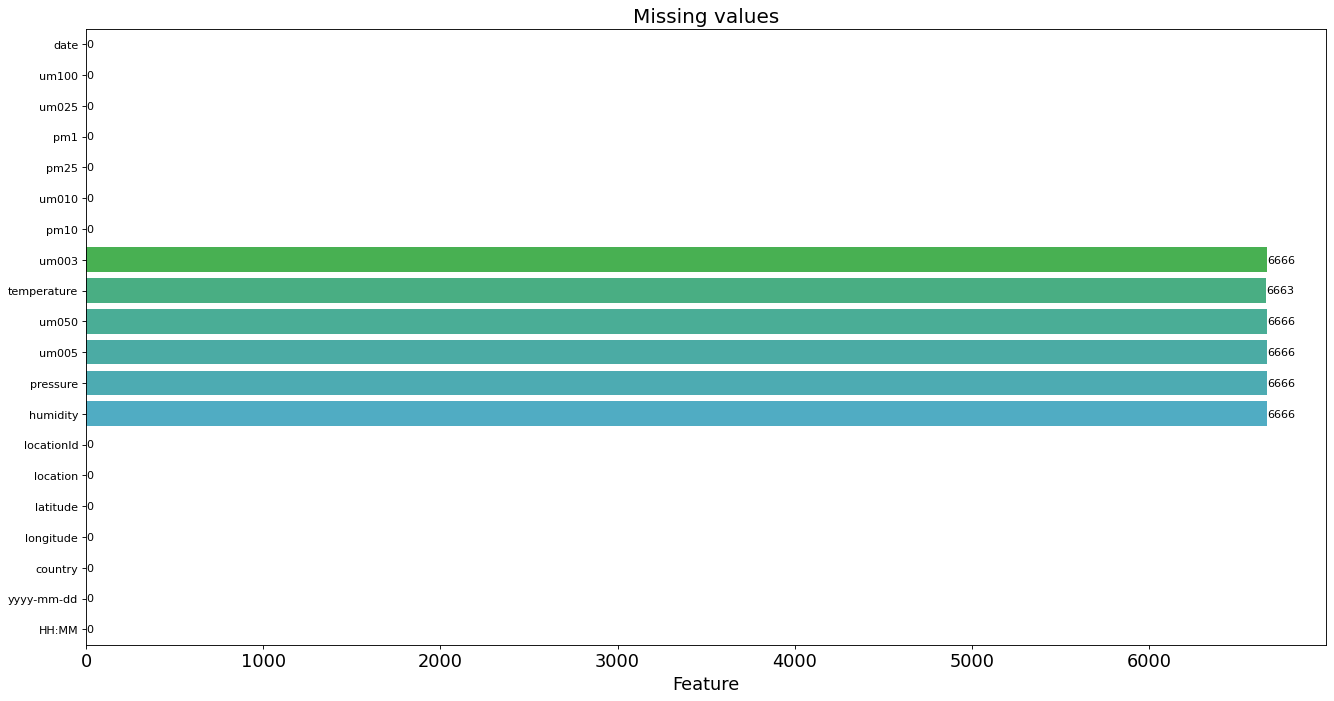

In [ ]:
tes = pd.DataFrame(df.isnull().sum())
tes = tes.rename(columns = {0 : 'Missing Values Sum'})

fig, ax = plt.subplots(figsize=(20, 10), dpi=80)
sns.barplot(tes,y=tes.index,x='Missing Values Sum')

plt.title('Missing values', fontsize=18)
plt.xlabel('Feature', fontsize=16)
plt.xticks(fontsize=16)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
df[df['um003'].isnull()][['date', 'um003', 'temperature', 'um050', 'um005', 'pressure', 'humidity']].set_index('date')

um003  temperature  um050  um005  pressure  humidity
date                                                                     
2023-01-01 15:00:00    NaN          NaN    NaN    NaN       NaN       NaN
2023-01-01 16:00:00    NaN          NaN    NaN    NaN       NaN       NaN
2023-01-01 17:00:00    NaN          NaN    NaN    NaN       NaN       NaN
2023-01-01 18:00:00    NaN          NaN    NaN    NaN       NaN       NaN
2023-01-01 19:00:00    NaN          NaN    NaN    NaN       NaN       NaN
...                    ...          ...    ...    ...       ...       ...
2023-05-31 11:00:00    NaN          NaN    NaN    NaN       NaN       NaN
2023-05-31 12:00:00    NaN          NaN    NaN    NaN       NaN       NaN
2023-05-31 13:00:00    NaN    92.333333    NaN    NaN       NaN       NaN
2023-05-31 14:00:00    NaN    90.923077    NaN    NaN       NaN       NaN
2023-05-31 15:00:00    NaN    91.000000    NaN    NaN       NaN       NaN

[6666 rows x 6 columns]

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':  # Cek jika kolom data kategorikal
        unique_values = df[column].unique()
        print(f"Unique values in {column}:", unique_values)

Unique values in location: ['Regatta The Icon' 'Ancol' 'Angkasa-Kemayoran' 'LTC Glodok'
 'Kelurahan Galur']
Unique values in country: ['ID']
Unique values in yyyy-mm-dd: ['2023-01-01' '2023-01-02' '2023-01-03' '2023-01-04' '2023-01-05'
 '2023-01-06' '2023-01-07' '2023-01-08' '2023-01-09' '2023-01-10'
 '2023-01-11' '2023-01-12' '2023-01-16' '2023-01-17' '2023-01-18'
 '2023-01-19' '2023-01-20' '2023-01-21' '2023-01-22' '2023-01-23'
 '2023-01-24' '2023-01-25' '2023-01-26' '2023-01-27' '2023-01-28'
 '2023-01-29' '2023-01-30' '2023-01-31' '2023-02-01' '2023-02-02'
 '2023-03-26' '2023-03-27' '2023-03-28' '2023-03-29' '2023-03-30'
 '2023-03-31' '2023-04-01' '2023-04-02' '2023-04-04' '2023-04-05'
 '2023-04-07' '2023-04-08' '2023-04-09' '2023-04-10' '2023-04-11'
 '2023-04-23' '2023-04-24' '2023-04-25' '2023-04-28' '2023-04-29'
 '2023-04-30' '2023-05-01' '2023-05-02' '2023-05-03' '2023-05-04'
 '2023-05-18' '2023-05-19' '2023-05-20' '2023-05-21' '2023-05-22'
 '2023-05-23' '2023-05-24' '2023-05-25

In [ ]:
df_drop = df.dropna()

**2023-05-31T16:00:00+07:00**

Date mulai tidak ada NaN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14362 entries, 0 to 14361
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         14362 non-null  datetime64[ns]
 1   um100        14362 non-null  float64       
 2   um025        14362 non-null  float64       
 3   pm1          14362 non-null  float64       
 4   pm25         14362 non-null  float64       
 5   um010        14362 non-null  float64       
 6   pm10         14362 non-null  float64       
 7   um003        7696 non-null   float64       
 8   temperature  7699 non-null   float64       
 9   um050        7696 non-null   float64       
 10  um005        7696 non-null   float64       
 11  pressure     7696 non-null   float64       
 12  humidity     7696 non-null   float64       
 13  locationId   14362 non-null  int64         
 14  location     14362 non-null  object        
 15  latitude     14362 non-null  float64       
 16  long

# **Analisis dan Visualisasi Data**

In [ ]:
df.describe()

um100         um025           pm1          pm25         um010  \
count  14362.000000  14362.000000  14362.000000  14362.000000  14362.000000   
mean       0.009924      0.179049     52.925651     67.207791      3.851751   
std        0.103508      0.452634    186.930173    188.367618      2.949660   
min        0.000000      0.000000      0.000000      0.090000      0.000000   
25%        0.000000      0.000333     18.397321     26.430000      1.614250   
50%        0.000769      0.100345     28.863148     42.922500      3.491484   
75%        0.011034      0.270667     37.300000     55.630000      5.405086   
max       10.390000     37.271000   1722.750000   1756.575000     77.193000   

               pm10        um003  temperature        um050        um005  \
count  14362.000000  7696.000000  7699.000000  7696.000000  7696.000000   
mean      73.942484    68.539023    85.868458     0.042045    24.687890   
std      188.585636    44.414536     8.968356     0.137270    12.451735   
min        0.205000     5.217368    73.000000     0.000000     0.508947   
25%       28.819598    31.777089    73.000000     0.000000    17.169667   
50%       51.900000    60.528753    88.724138     0.029636    23.357663   
75%       66.848707    94.774839    92.148352     0.061617    31.727989   
max     1760.100000   341.605714   109.500000     8.484167   103.131429   

          pressure     humidity     locationId      latitude     longitude  
count  7696.000000  7696.000000   14362.000000  14362.000000  14362.000000  
mean    898.345428    57.912951  276238.468876     -6.129139    106.826198  
std     175.006789     9.491880   70851.379032      0.023841      0.023796  
min     626.270000    21.480000   66145.000000     -6.175558    106.793090  
25%     626.270000    51.066667  222854.000000     -6.146273    106.816320  
50%    1010.062280    58.365152  299574.000000     -6.124591    106.816320  
75%    1011.535731    68.000000  299575.000000     -6.124591    106.851210  
max    1016.132333    76.033333  354662.000000     -6.094740    106.854400

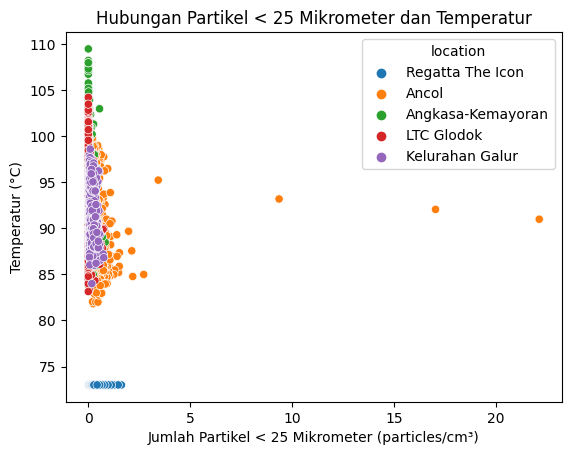

In [ ]:
sns.scatterplot(data=df, x='um025', y='temperature', hue='location')
plt.title('Hubungan Partikel < 25 Mikrometer dan Temperatur')
plt.xlabel('Jumlah Partikel < 25 Mikrometer (particles/cm³)')
plt.ylabel('Temperatur (°C)')
plt.show()

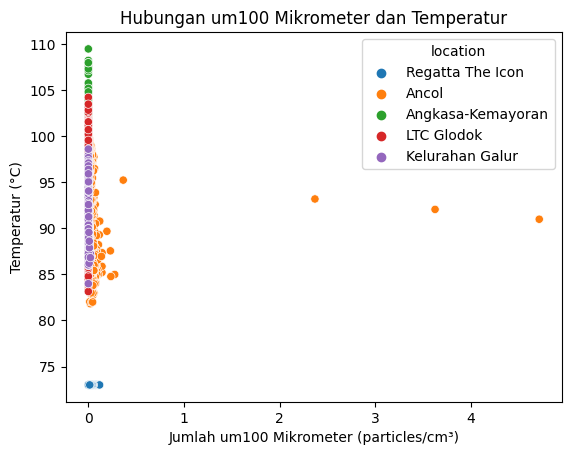

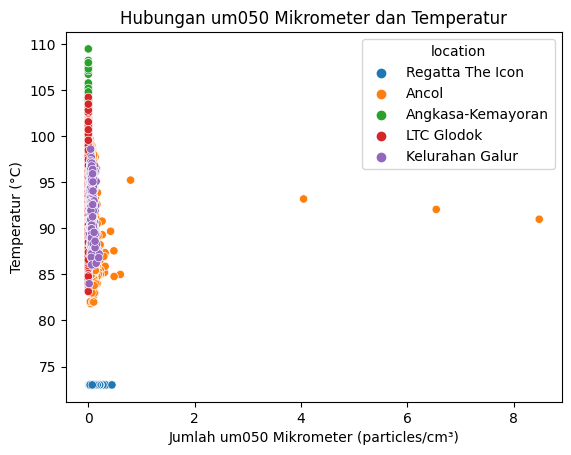

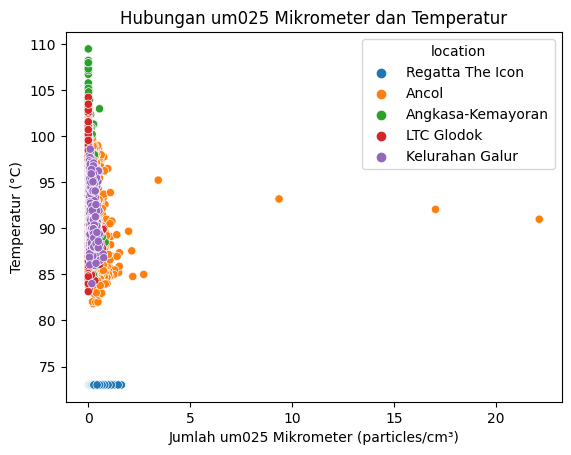

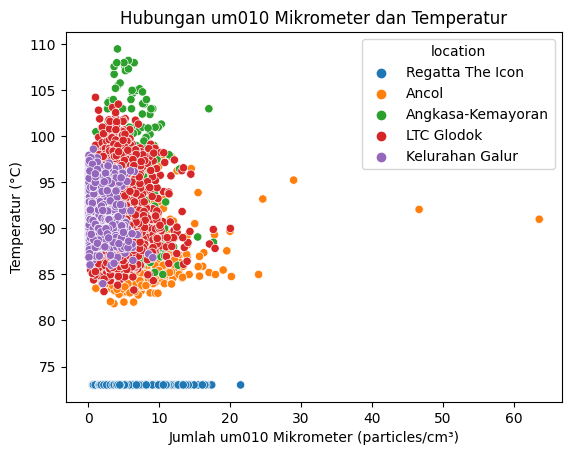

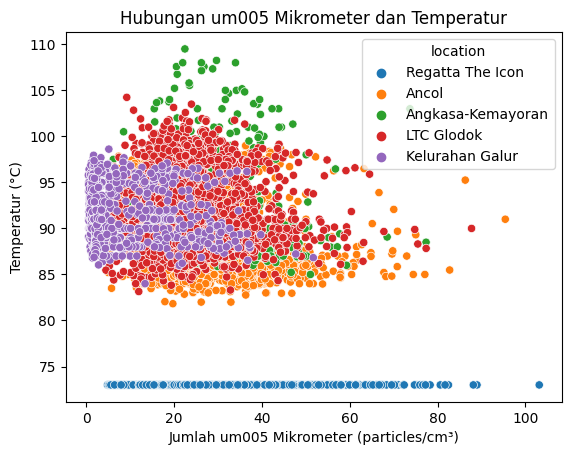

In [ ]:
for i in ['um100', 'um050', 'um025', 'um010', 'um005']:
  sns.scatterplot(data=df, x=i, y='temperature', hue='location')
  plt.title('Hubungan '+ i +' Mikrometer dan Temperatur')
  plt.xlabel('Jumlah '+ i +' Mikrometer (particles/cm³)')
  plt.ylabel('Temperatur (°C)')
  plt.show()

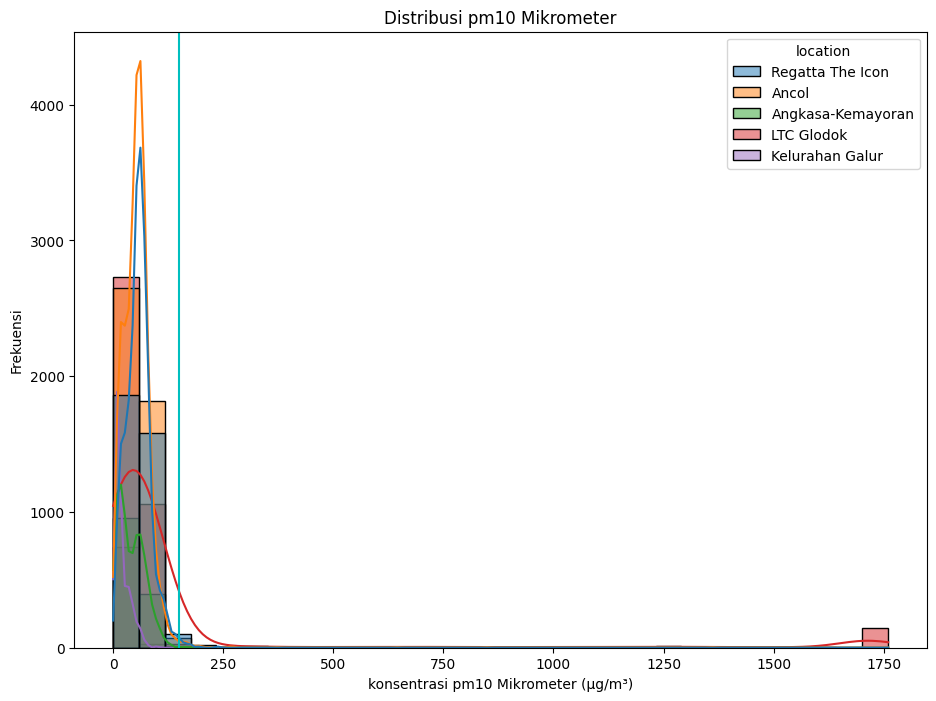

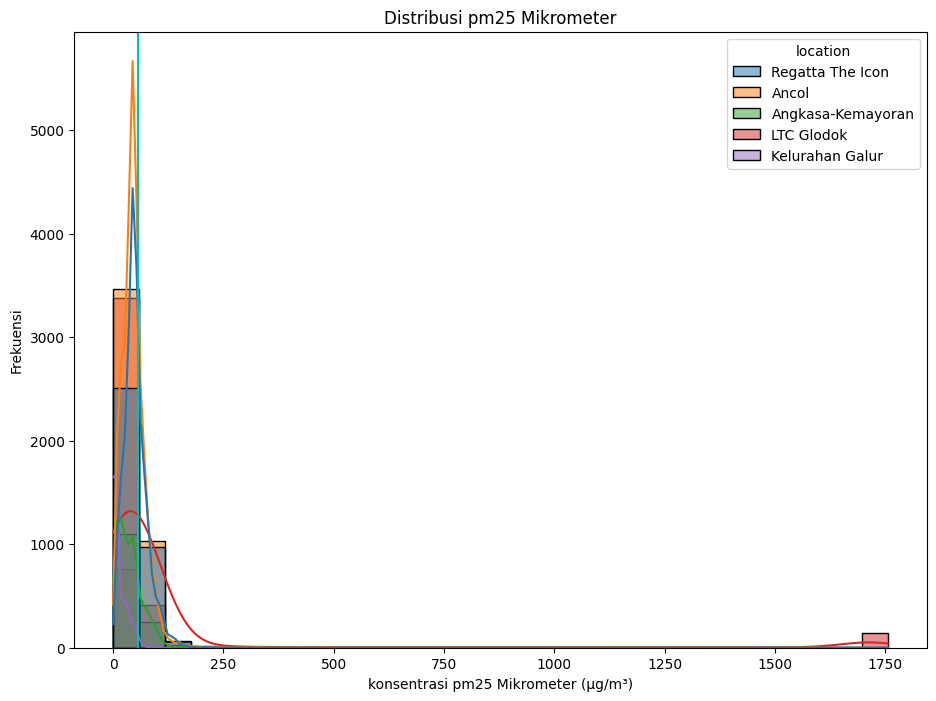

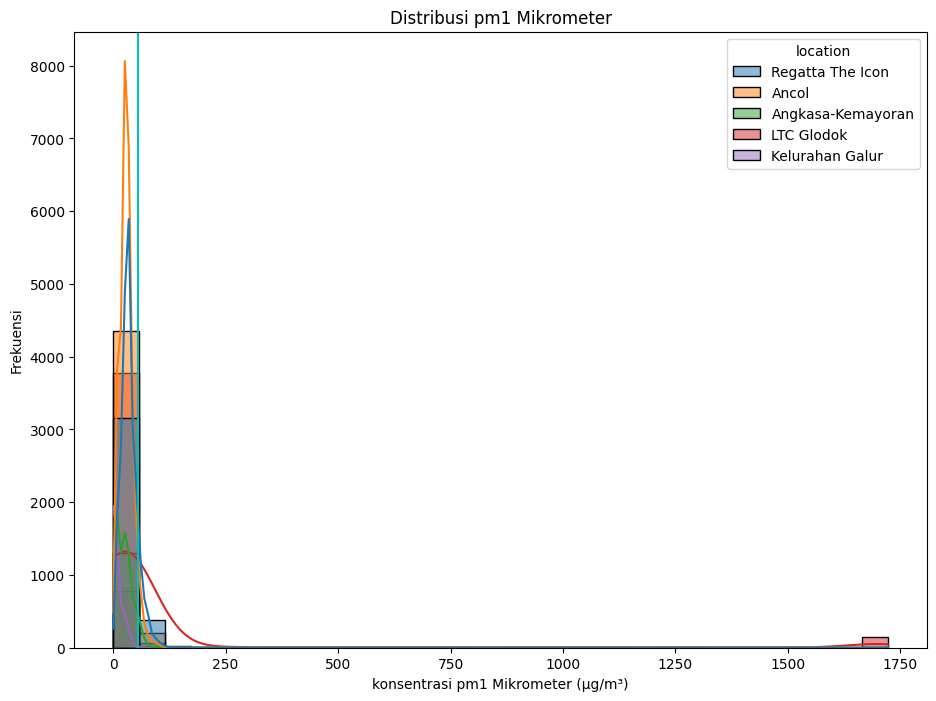

In [ ]:
for i in ['pm10', 'pm25', 'pm1']:
  if i == 'pm10' :
    plt.figure(figsize=(11, 8))
    sns.histplot(data=df, x=i, hue='location', bins=30, kde=True)
    plt.title('Distribusi '+ i + ' Mikrometer')
    plt.xlabel('konsentrasi '+ i +' Mikrometer (µg/m³)')
    plt.ylabel('Frekuensi')
    plt.axvline(x = 150, color = 'c', linestyle = '-')

  else :
    plt.figure(figsize=(11, 8))
    sns.histplot(data=df, x=i, hue='location', bins=30, kde=True)
    plt.title('Distribusi '+ i + ' Mikrometer')
    plt.xlabel('konsentrasi '+ i +' Mikrometer (µg/m³)')
    plt.ylabel('Frekuensi')
    plt.axvline(x = 55.4, color = 'c', linestyle = '-')

  plt.show()


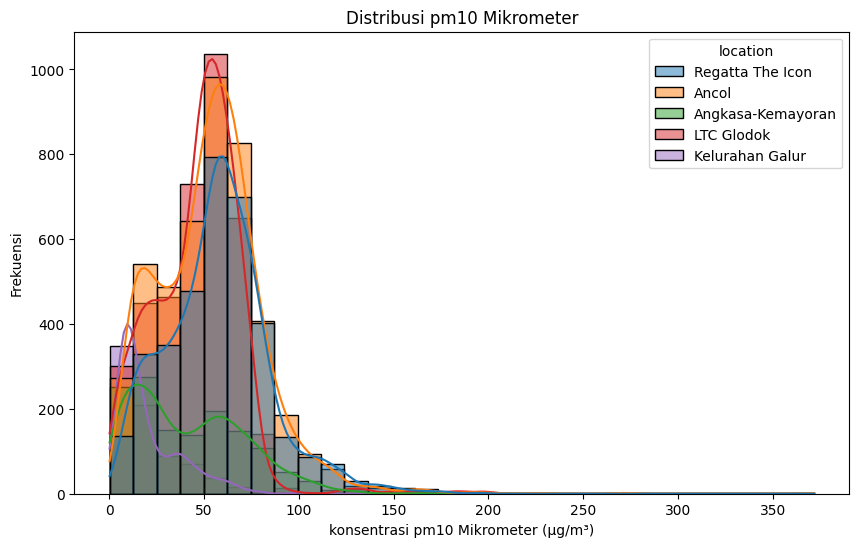

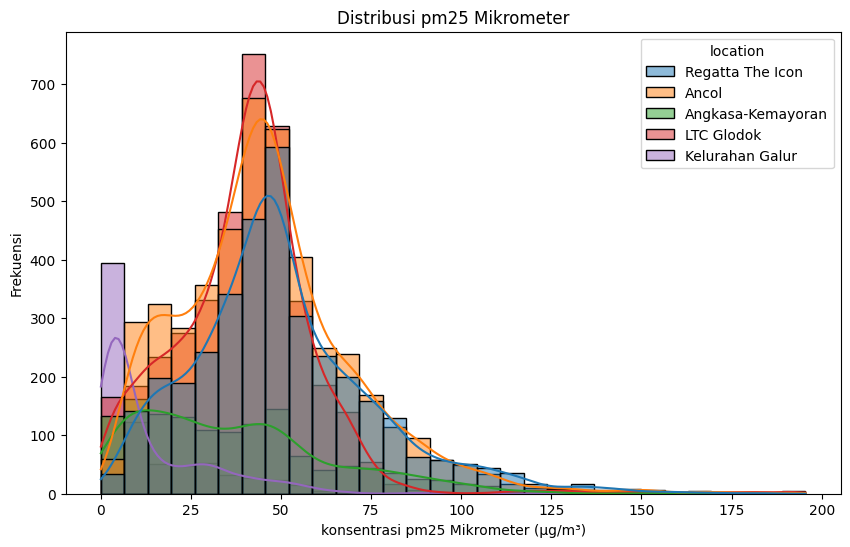

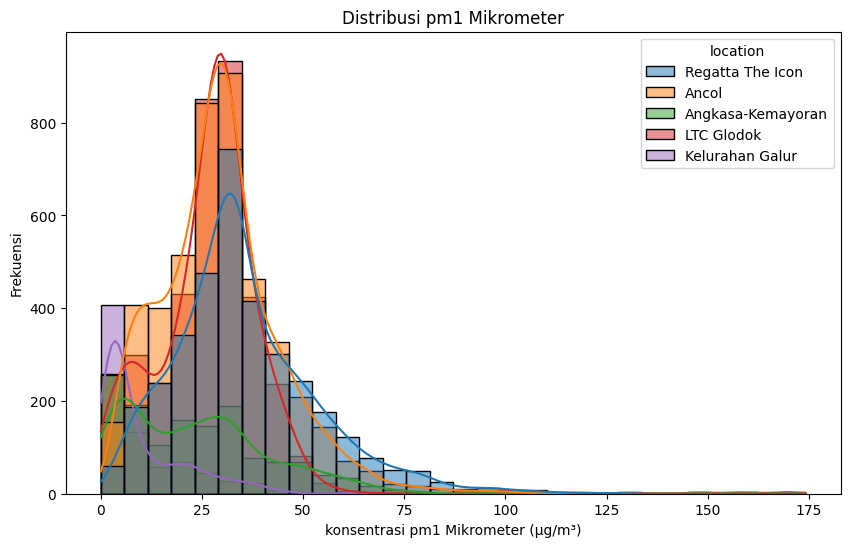

In [ ]:
tes = df[(df['pm25'] < 200)]
for i in ['pm10', 'pm25', 'pm1']:
  plt.figure(figsize=(10, 6))
  sns.histplot(data=tes, x=i, hue='location', bins=30, kde=True)
  plt.title('Distribusi '+ i + ' Mikrometer')
  plt.xlabel('konsentrasi '+ i +' Mikrometer (µg/m³)')
  plt.ylabel('Frekuensi')
  plt.show()

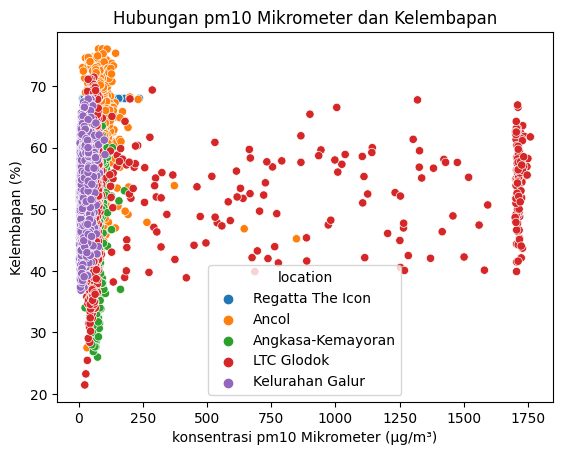

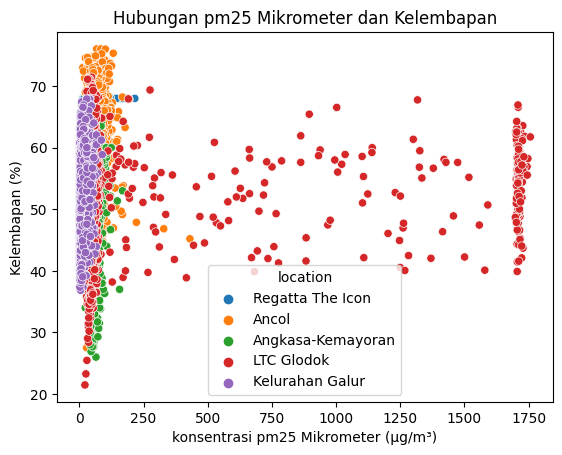

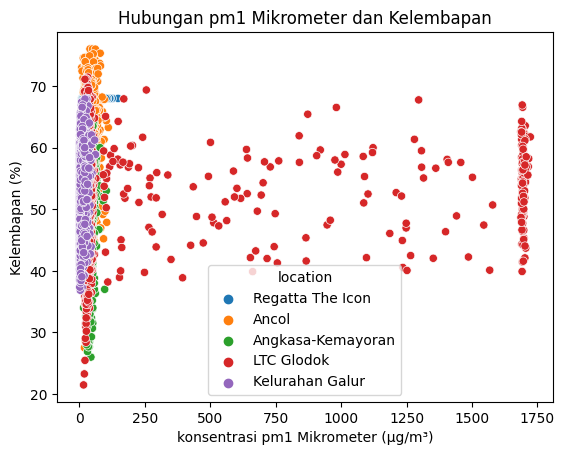

In [ ]:
for i in ['pm10', 'pm25', 'pm1']:
  sns.scatterplot(data=df, x=i, y='humidity', hue = 'location')
  plt.title('Hubungan ' + i + ' Mikrometer dan Kelembapan')
  plt.xlabel('konsentrasi ' + i + ' Mikrometer (µg/m³)')
  plt.ylabel('Kelembapan (%)')
  plt.show()

<ipython-input-37-deba6701f23c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


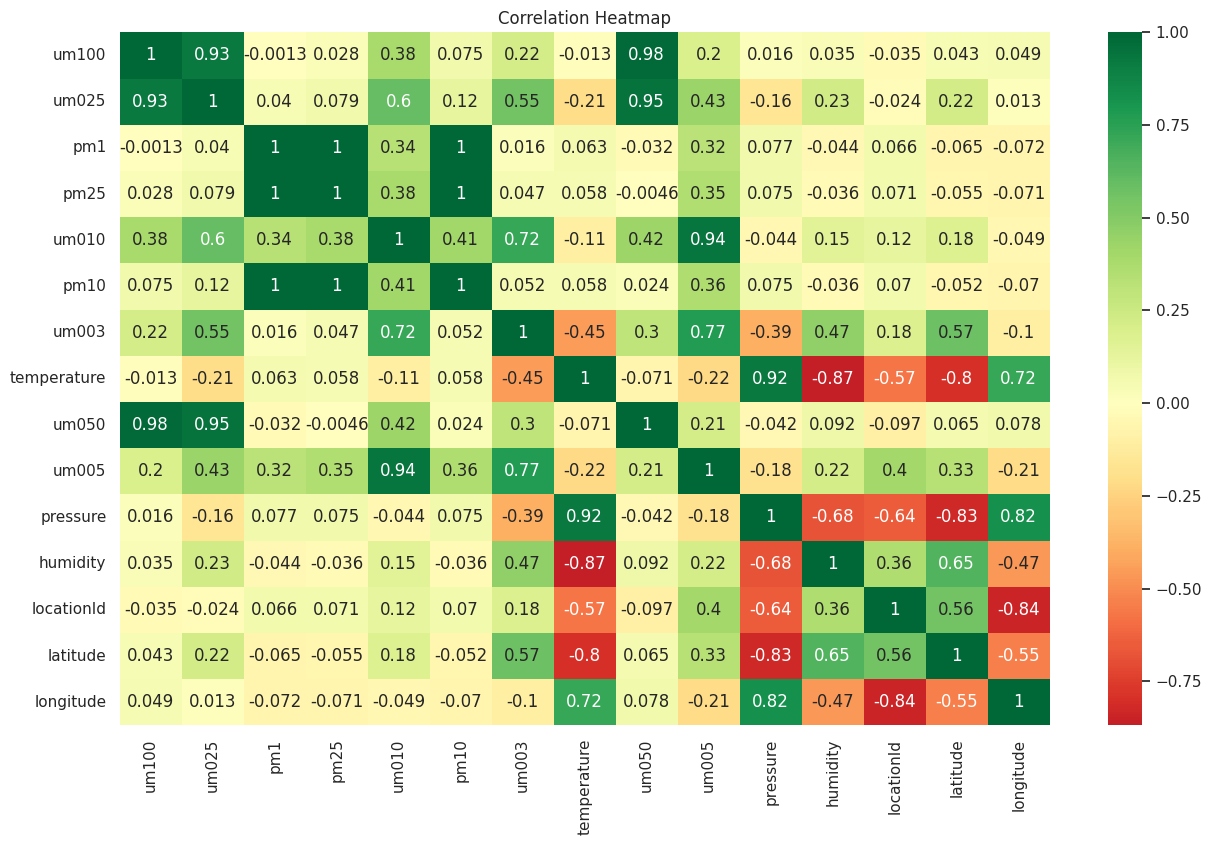

In [ ]:
#Heatmap Corr
correlation_matrix = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', center=0)
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-18-b3f032e1d731>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rata_rata = df.groupby('HH:MM').mean()


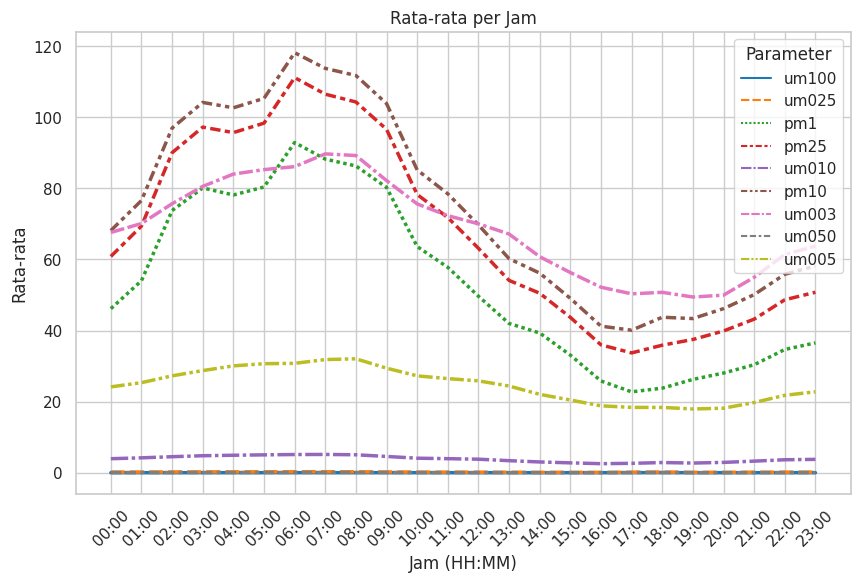

In [ ]:
# Kelompokkan data berdasarkan 'HH:MM' dan hitung rata-rata
rata_rata = df.groupby('HH:MM').mean()

# Gunakan Seaborn untuk membuat grafik
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(data=rata_rata[['um100', 'um025', 'pm1', 'pm25', 'um010', 'pm10','um003','um050','um005']], palette="tab10", linewidth=2.5)
plt.xlabel('Jam (HH:MM)')
plt.ylabel('Rata-rata')
plt.title('Rata-rata per Jam')
plt.legend(title='Parameter', loc='upper right')
plt.xticks(rotation=45)
plt.show()

<ipython-input-19-3c7b299b4dc5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rata_rata = df_drop.groupby('HH:MM').mean()


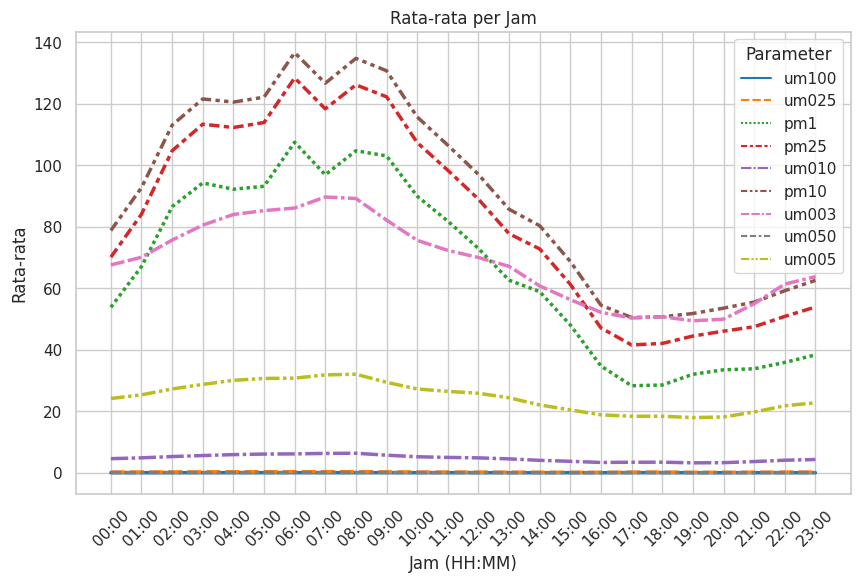

In [ ]:
# Kelompokkan data berdasarkan 'HH:MM' dan hitung rata-rata
rata_rata = df_drop.groupby('HH:MM').mean()

# Gunakan Seaborn untuk membuat grafik
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(data=rata_rata[['um100', 'um025', 'pm1', 'pm25', 'um010', 'pm10','um003','um050','um005']], palette="tab10", linewidth=2.5)
plt.xlabel('Jam (HH:MM)')
plt.ylabel('Rata-rata')
plt.title('Rata-rata per Jam')
plt.legend(title='Parameter', loc='upper right')
plt.xticks(rotation=45)
plt.show()

<ipython-input-20-00f63774b91c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rata_rata = df.groupby('HH:MM').mean()


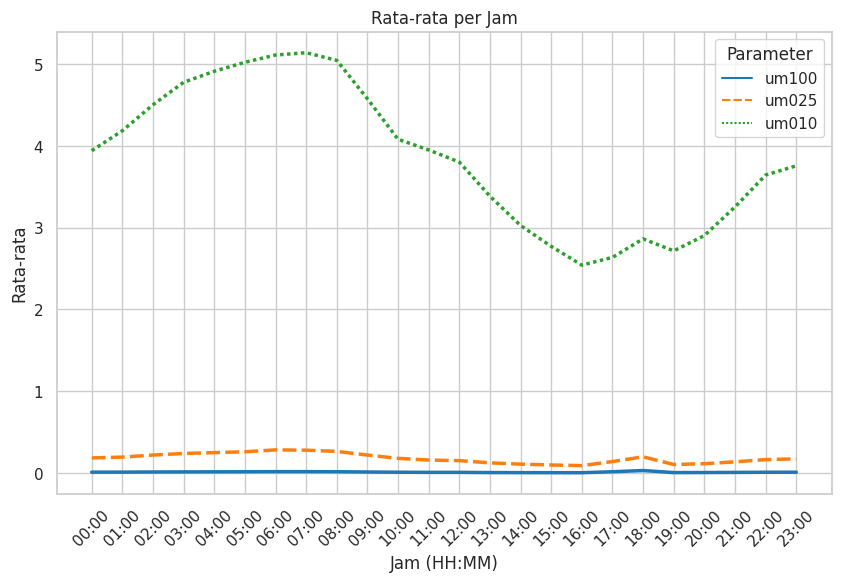

In [ ]:
# Kelompokkan data berdasarkan 'HH:MM' dan hitung rata-rata
rata_rata = df.groupby('HH:MM').mean()

# Gunakan Seaborn untuk membuat grafik
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(data=rata_rata[['um100', 'um025', 'um010']], palette="tab10", linewidth=2.5)
plt.xlabel('Jam (HH:MM)')
plt.ylabel('Rata-rata')
plt.title('Rata-rata per Jam')
plt.legend(title='Parameter', loc='upper right')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


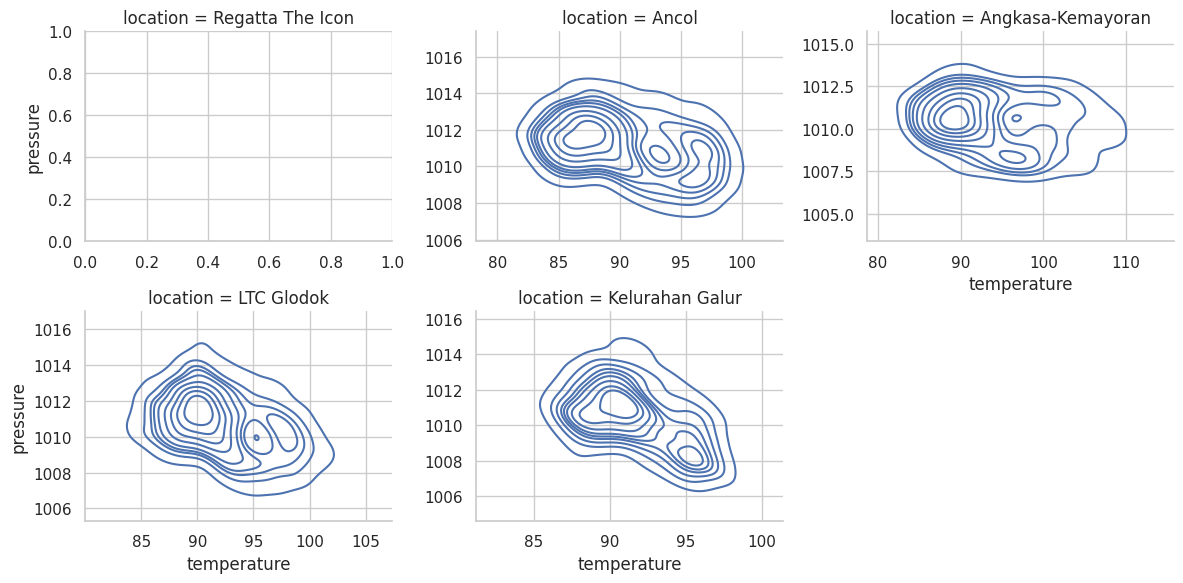

In [ ]:
# sns.set(font_scale=5)
g = sns.FacetGrid(df_drop, col='location',# palette='Set2',
                  aspect=16/12, col_wrap=3, sharex=False, sharey=False)
## opsi lain: height, sharex=False, sharey=False
g.map(sns.kdeplot,'temperature','pressure')
g.fig.tight_layout()

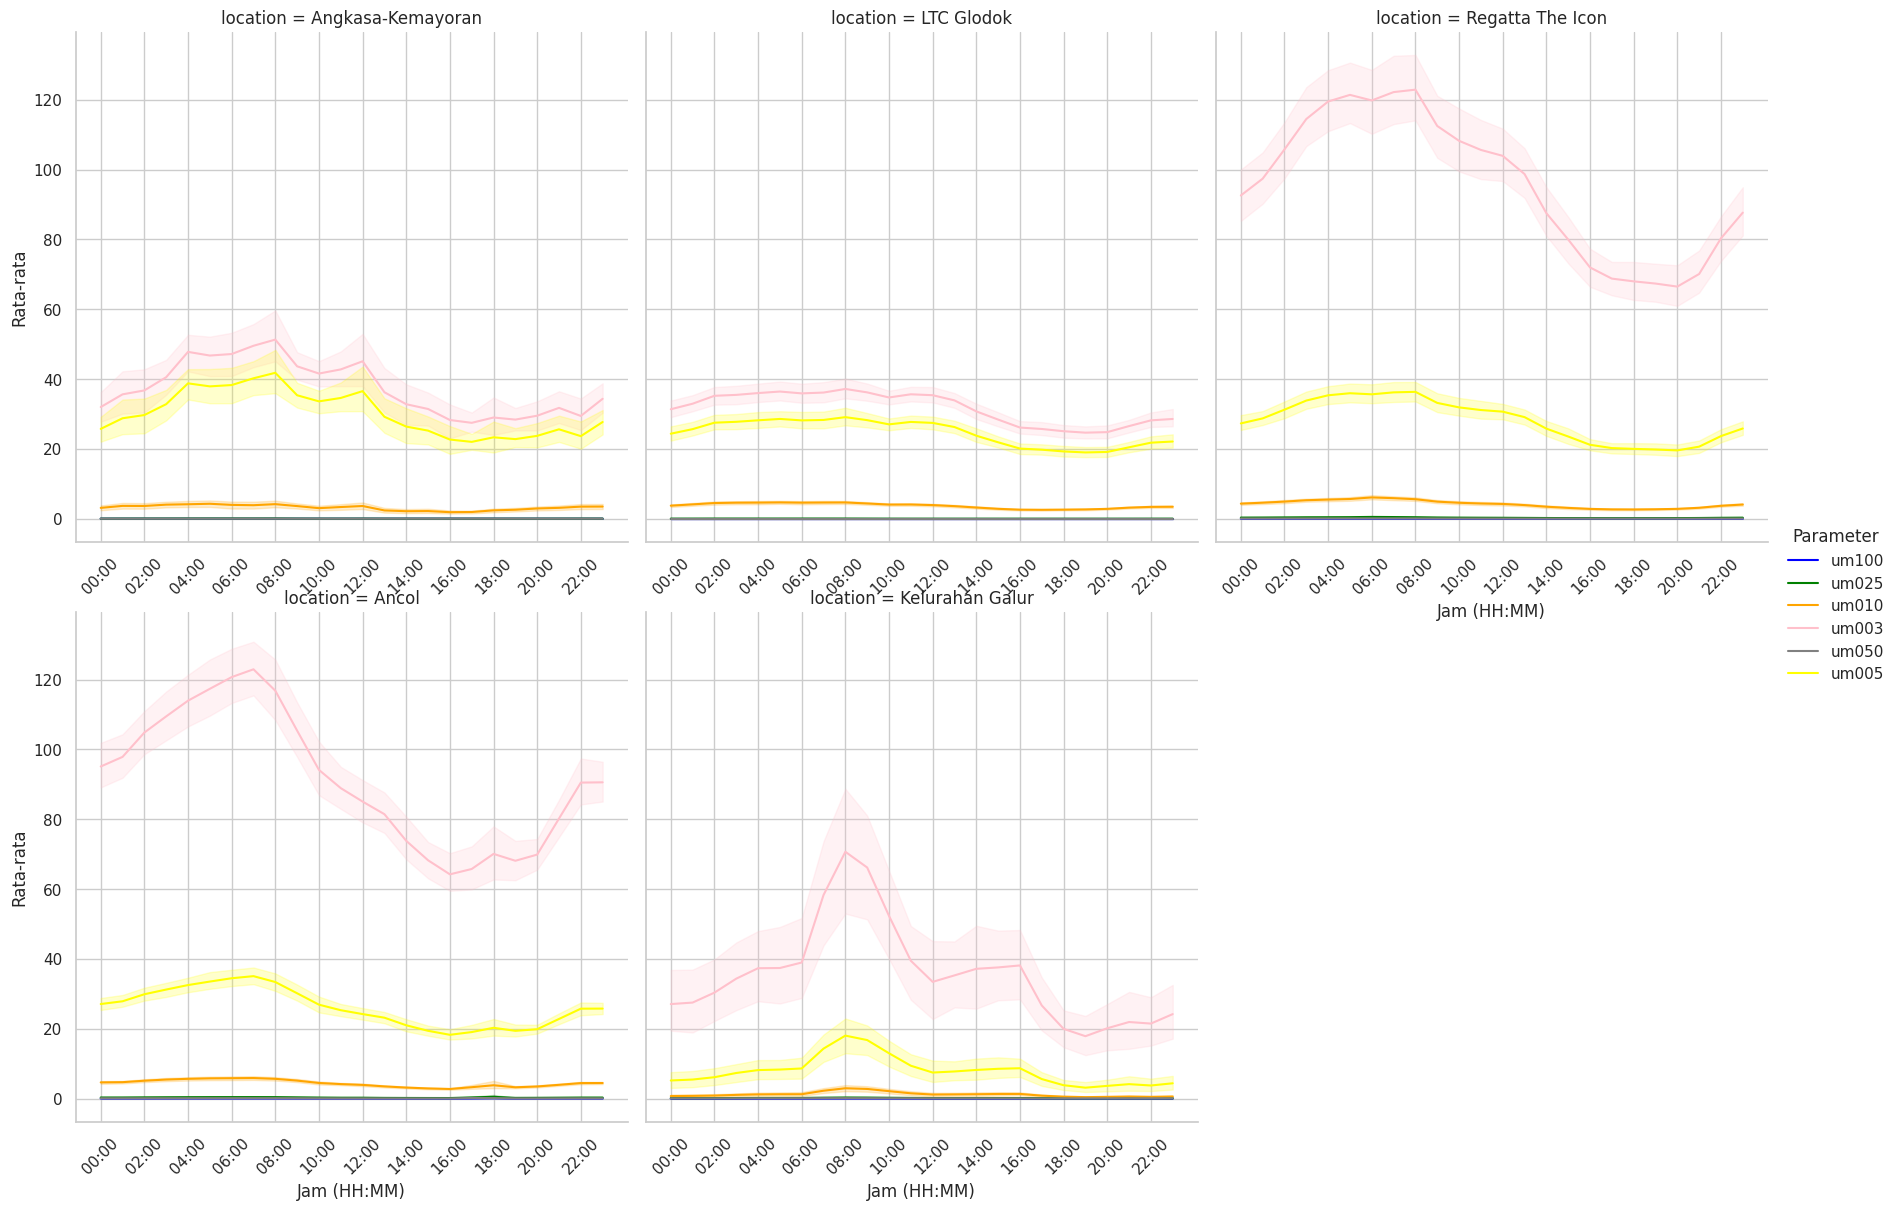

In [ ]:
# Urutkan DataFrame berdasarkan kolom 'HH:MM'
df_sorted = df.sort_values(by='HH:MM')

# Buat FacetGrid untuk 5 lokasi
g = sns.FacetGrid(df_sorted, col='location', col_wrap=3, height=6, sharex=False, sharey=True)  # Mengatur ukuran grafik menjadi lebih besar

# Gunakan g.map untuk menggambar grafik rata-rata per jam dari setiap kolom untuk masing-masing lokasi
g.map(sns.lineplot, 'HH:MM', 'um100', label='um100', color='blue')
g.map(sns.lineplot, 'HH:MM', 'um025', label='um025', color='green')
g.map(sns.lineplot, 'HH:MM', 'um010', label='um010', color='orange')
g.map(sns.lineplot, 'HH:MM', 'um003', label='um003', color='pink')
g.map(sns.lineplot, 'HH:MM', 'um050', label='um050', color='gray')
g.map(sns.lineplot, 'HH:MM', 'um005', label='um005', color='yellow')

# Atur label
g.set_axis_labels('Jam (HH:MM)', 'Rata-rata')
g.set_xticklabels(rotation=45)

# Tambahkan legenda
g.add_legend(title='Parameter')

for ax in g.axes.flat:
    ax.set_xticks(ax.get_xticks()[::2])  # Setiap 2 label

# Tampilkan grafik
plt.show()

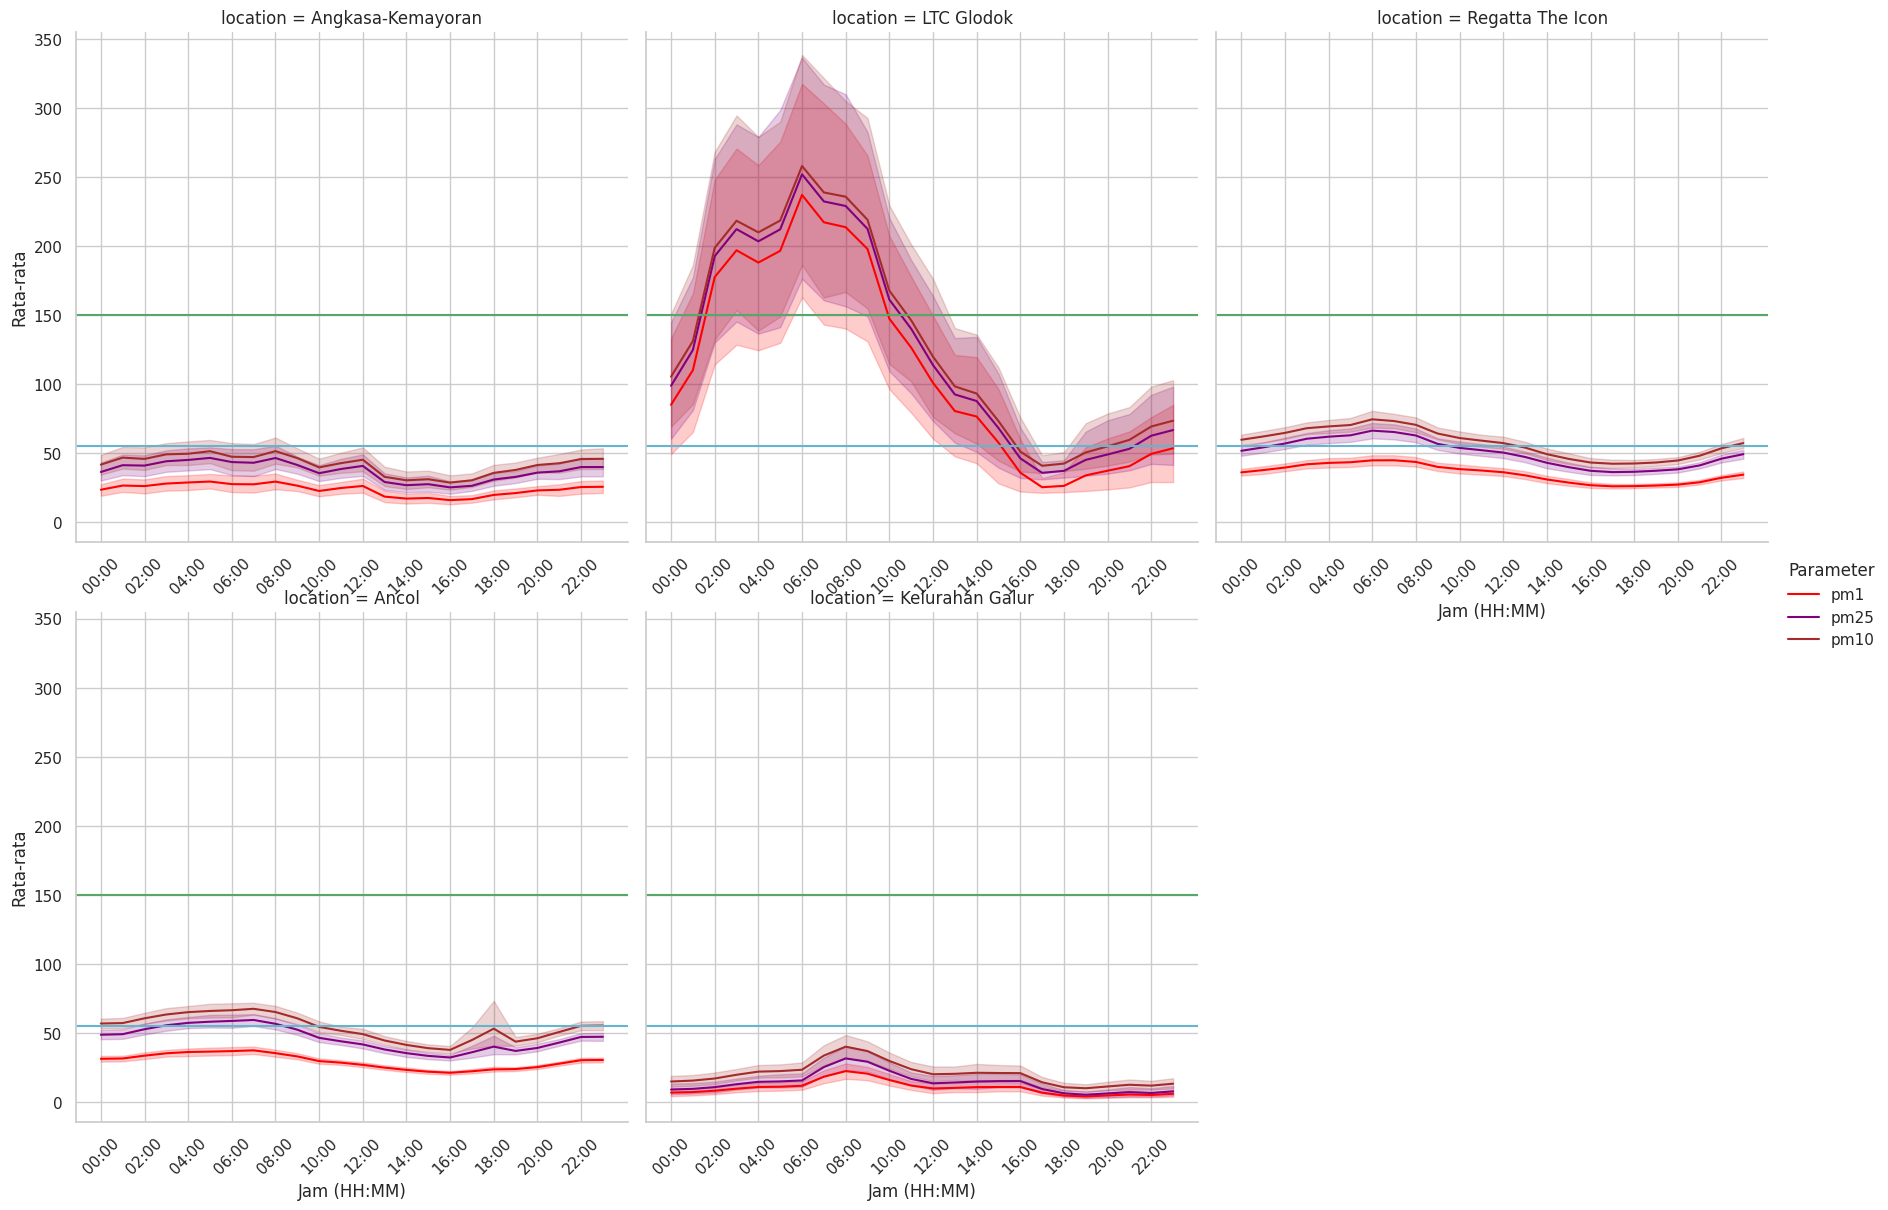

In [ ]:
# Urutkan DataFrame berdasarkan kolom 'HH:MM'
df_sorted = df.sort_values(by='HH:MM')

sns.set(style="whitegrid")
# Buat FacetGrid untuk 5 lokasi
g = sns.FacetGrid(df_sorted, col='location', col_wrap=3, height=6, sharex=False, sharey=True)  # Mengatur ukuran grafik menjadi lebih besar

# Gunakan g.map untuk menggambar grafik rata-rata per jam dari setiap kolom untuk masing-masing lokasi
g.map(sns.lineplot, 'HH:MM', 'pm1', label='pm1', color='red')
g.map(sns.lineplot, 'HH:MM', 'pm25', label='pm25', color='purple')
g.map(sns.lineplot, 'HH:MM', 'pm10', label='pm10', color='brown')

# Atur label
g.set_axis_labels('Jam (HH:MM)', 'Rata-rata')
g.set_xticklabels(rotation=45)

# Tambahkan legenda
g.add_legend(title='Parameter')

for ax in g.axes.flat:
  ax.axhline(y = 150, color = 'g', linestyle = '-')
  ax.axhline(y = 55.4, color = 'c', linestyle = '-')
  ax.set_xticks(ax.get_xticks()[::2])  # Setiap 2 label

# Tampilkan grafik
plt.show()

<ipython-input-24-fd464e190322>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rata_rata = df.groupby(['location', 'HH:MM'])['um100', 'um025', 'pm1', 'pm25', 'um010', 'pm10','um003','um050','um005'].mean().reset_index()


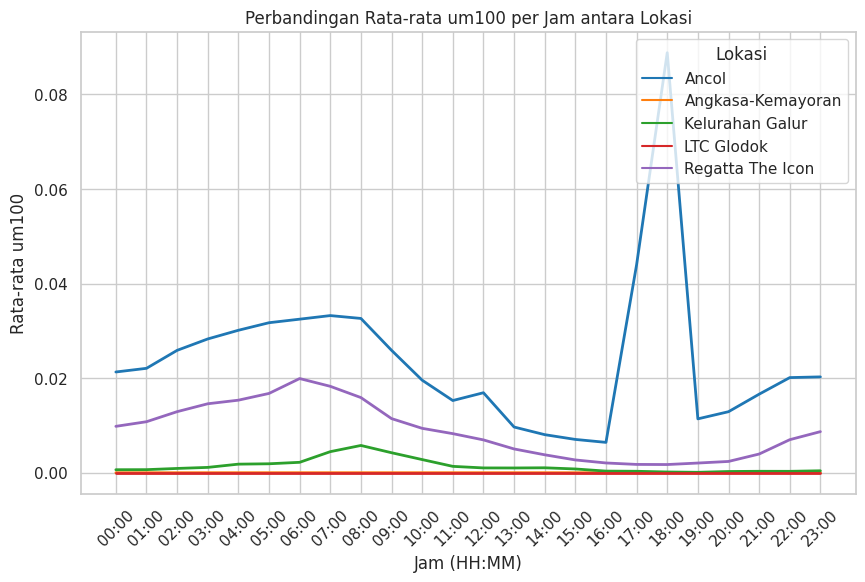

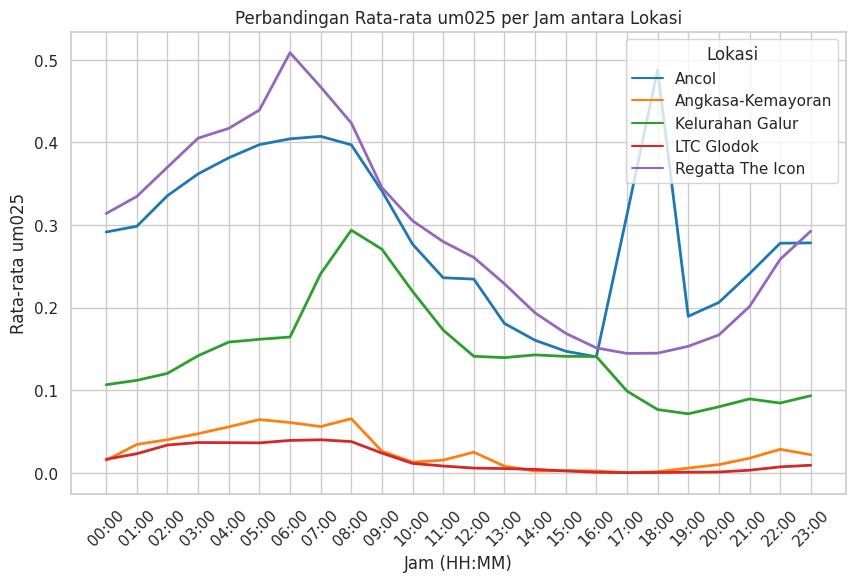

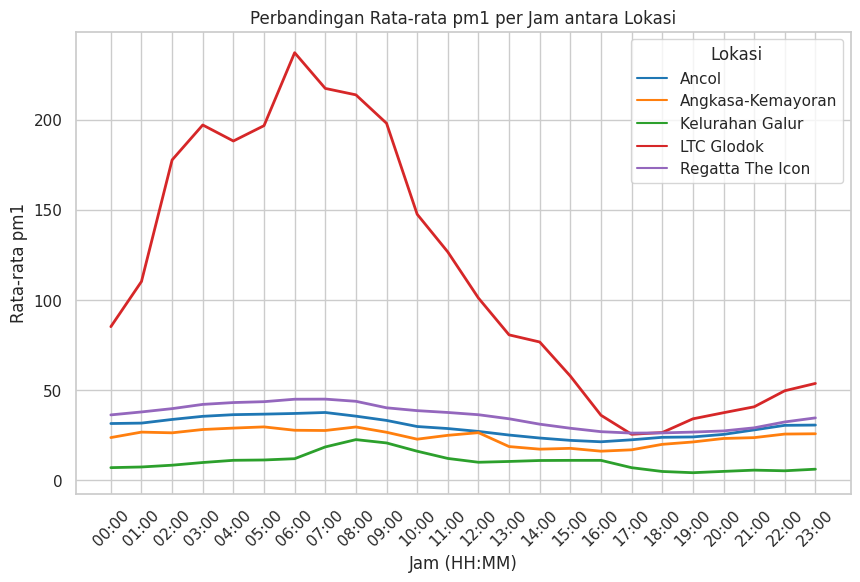

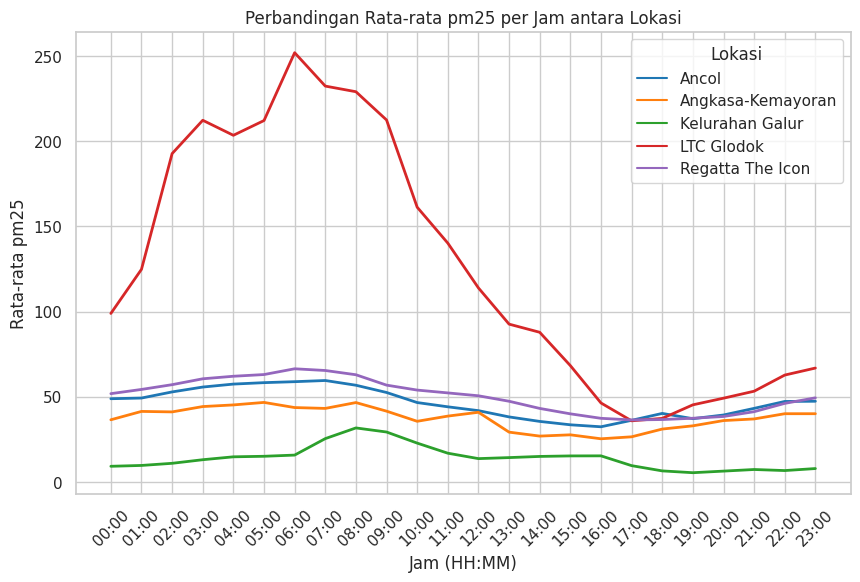

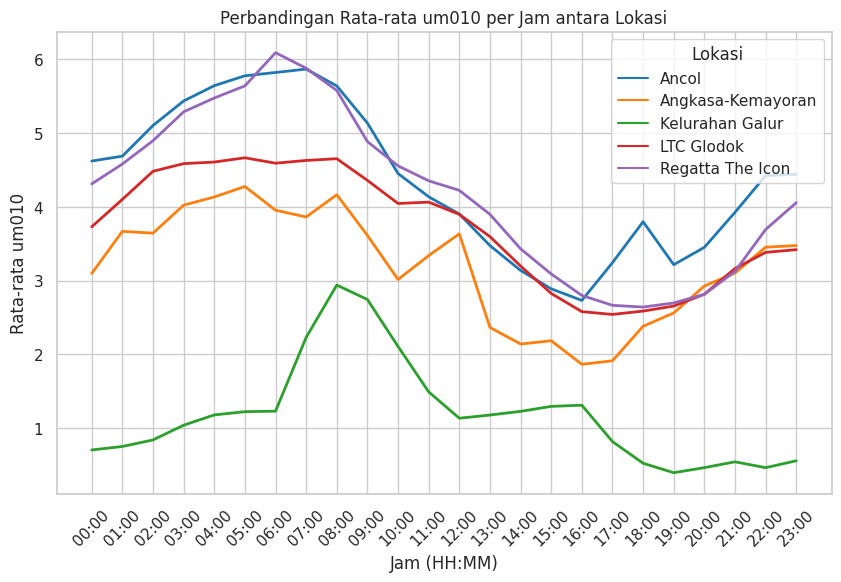

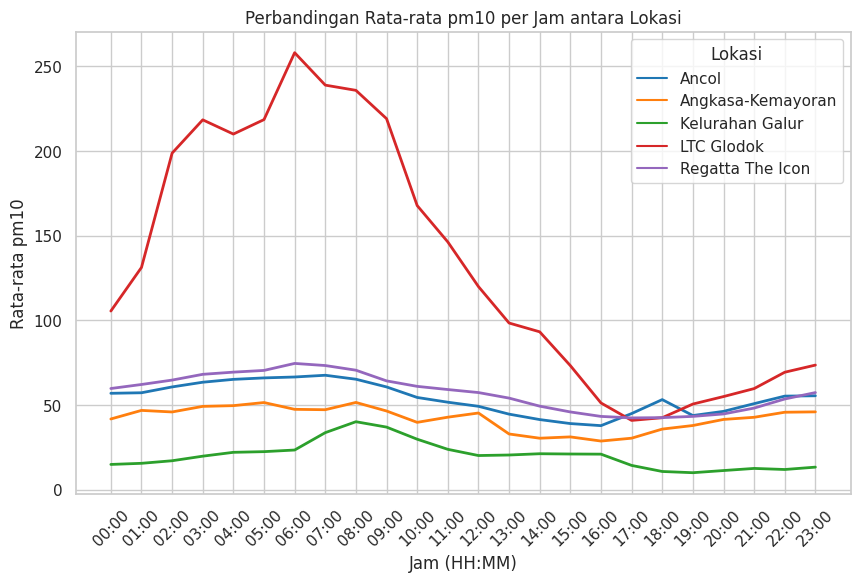

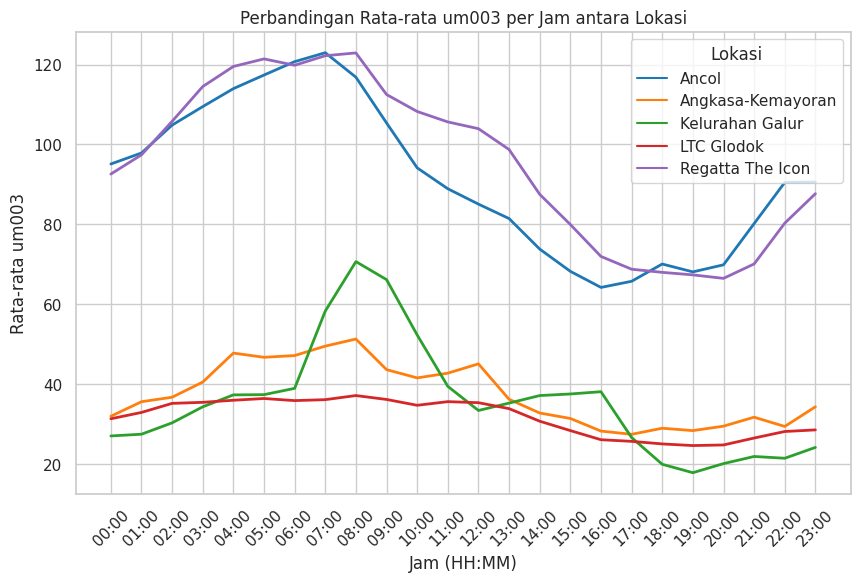

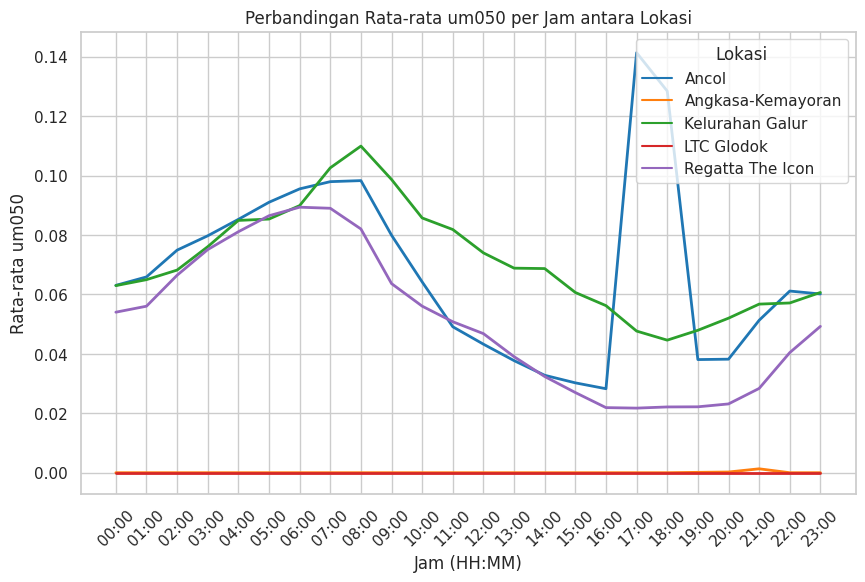

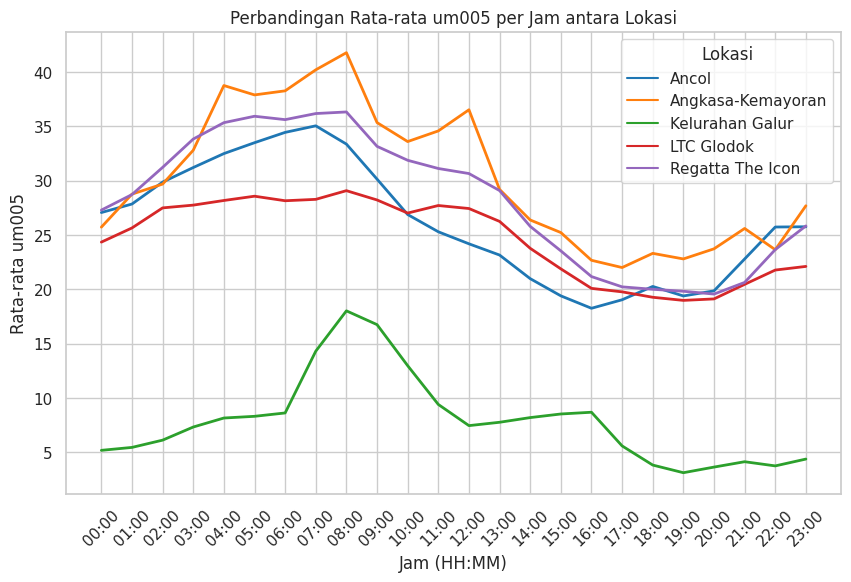

In [ ]:
# Kelompokkan data berdasarkan 'location' dan 'HH:MM', lalu hitung rata-rata 'um100'
rata_rata = df.groupby(['location', 'HH:MM'])['um100', 'um025', 'pm1', 'pm25', 'um010', 'pm10','um003','um050','um005'].mean().reset_index()

# Gunakan sns.lineplot untuk menggambar grafik perbandingan
for i in ['um100', 'um025', 'pm1', 'pm25', 'um010', 'pm10','um003','um050','um005']:
  plt.figure(figsize=(10, 6))
  sns.set(style="whitegrid")
  sns.lineplot(data=rata_rata, x='HH:MM', y=i, hue='location',palette="tab10",linewidth=2)
  plt.xlabel('Jam (HH:MM)')
  plt.ylabel('Rata-rata '+ i)
  plt.title('Perbandingan Rata-rata '+ i +' per Jam antara Lokasi')
  plt.legend(title='Lokasi', loc='upper right')
  plt.xticks(rotation=45)
  plt.show()



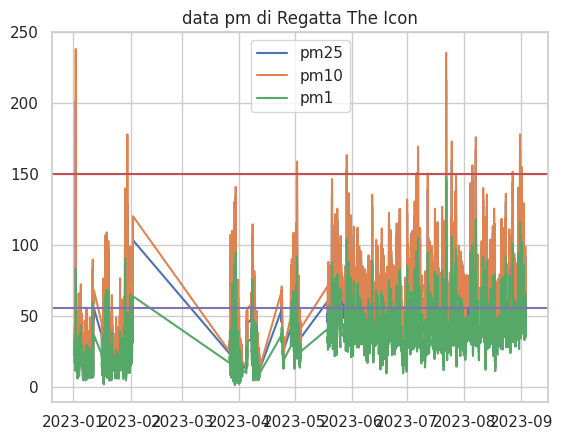

<Figure size 1000x600 with 0 Axes>

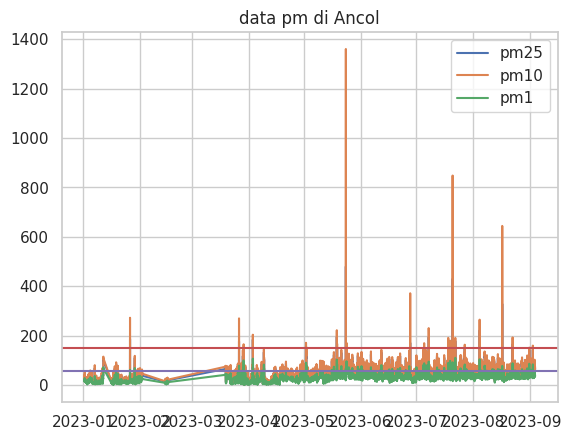

<Figure size 1000x600 with 0 Axes>

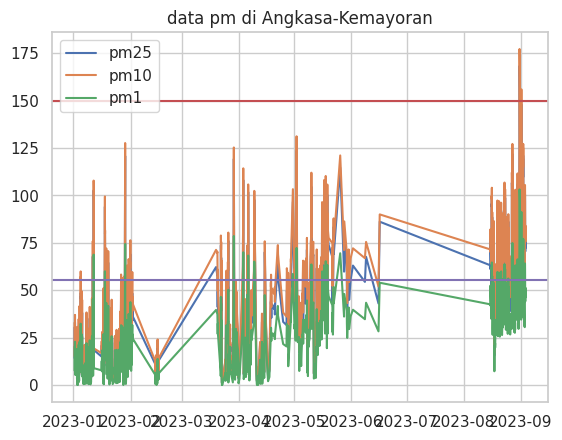

<Figure size 1000x600 with 0 Axes>

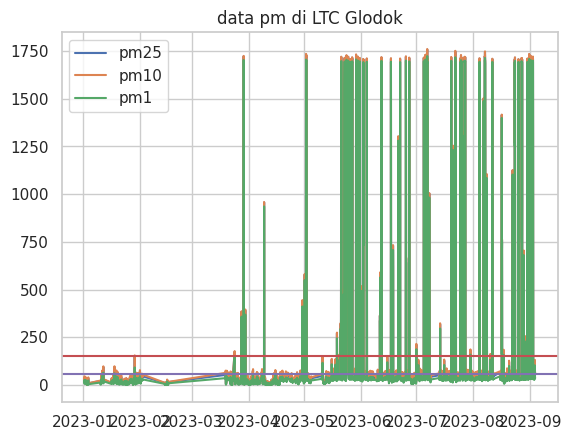

<Figure size 1000x600 with 0 Axes>

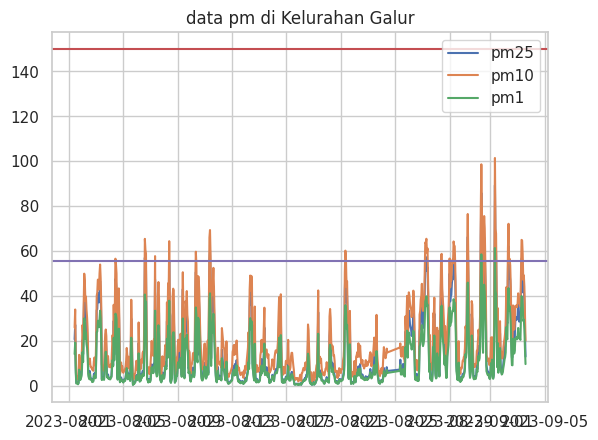

<Figure size 1000x600 with 0 Axes>

In [ ]:
for j in df['location'].unique():
  for i in ['pm25', 'pm10', 'pm1']:
    tes =df[(df['location'] == j)]
    plt.title('data pm di ' + j)
    plt.plot(tes['date'], tes[i])
    plt.legend(['pm25', 'pm10', 'pm1'])

  plt.axhline(y = 150, color = 'r', linestyle = '-')
  plt.axhline(y = 55.4, color = 'm', linestyle = '-')
  plt.figure(figsize=(10, 6))
  plt.show()

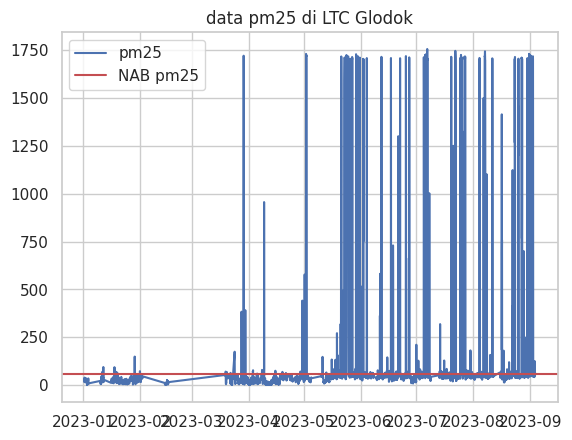

<Figure size 1000x600 with 0 Axes>

In [ ]:
tes =df[(df['location'] == 'LTC Glodok')]
plt.title('data pm25 di LTC Glodok')
plt.plot(tes['date'], tes['pm25'])
plt.axhline(y = 55.4, color = 'r', linestyle = '-')
plt.legend(['pm25', 'NAB pm25'])
plt.figure(figsize=(10, 6))
plt.show()

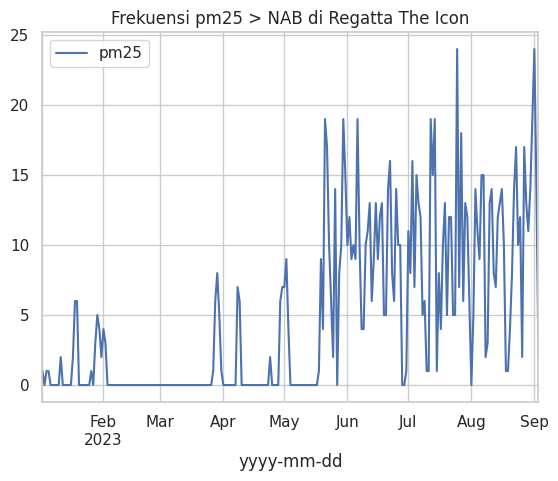

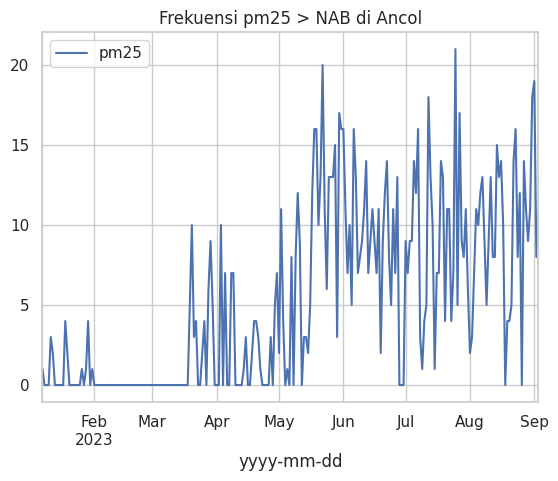

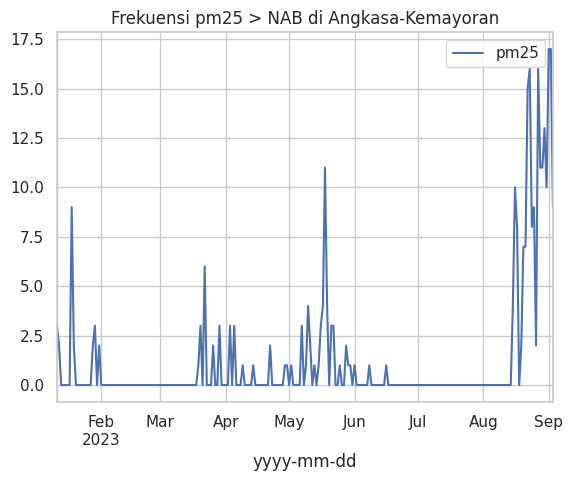

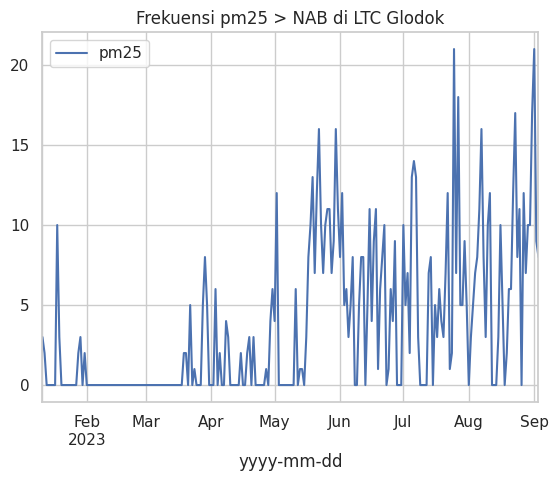

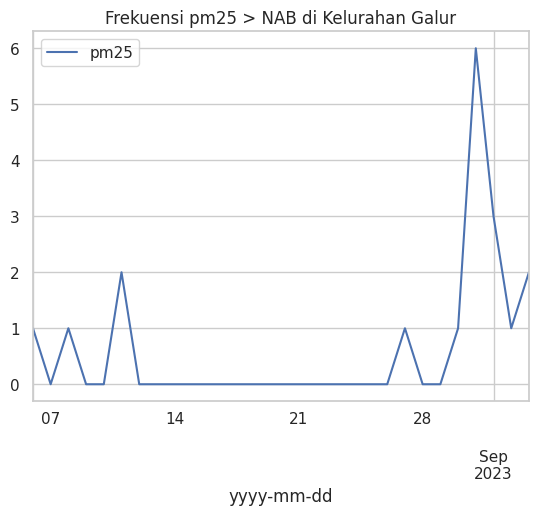

In [ ]:
for j in df['location'].unique():
  tes =df[((df['location'] == j) & (df['pm25'] > 55.4))]
  tes2 = tes.groupby(['yyyy-mm-dd'])[['pm25']].count()
  tes2.reset_index(inplace=True)
  tes2['yyyy-mm-dd'] = pd.to_datetime(tes2['yyyy-mm-dd'])
  dt1 = tes2['yyyy-mm-dd'].min()
  dt2 = tes2['yyyy-mm-dd'].max()
  date= pd.date_range(start=dt1, end=dt2, freq='D')
  tes2_date= pd.DataFrame({'yyyy-mm-dd': date})

  tes3 = pd.merge(tes2_date, tes2, on='yyyy-mm-dd', how='left')
  tes3['pm25'].fillna(0, inplace=True)
  tes3.set_index('yyyy-mm-dd', inplace=True)
  tes3.plot()
  plt.title('Frekuensi pm25 > NAB di ' + j)

<ipython-input-28-8393a708479b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes['month'] = pd.DatetimeIndex(tes['date']).month
<ipython-input-28-8393a708479b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes['month'] = pd.DatetimeIndex(tes['date']).month
<ipython-input-28-8393a708479b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

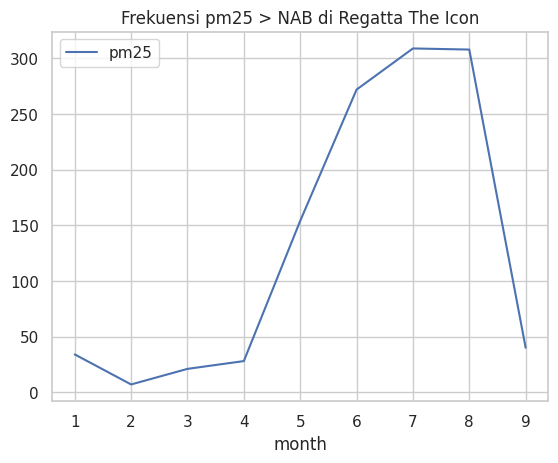

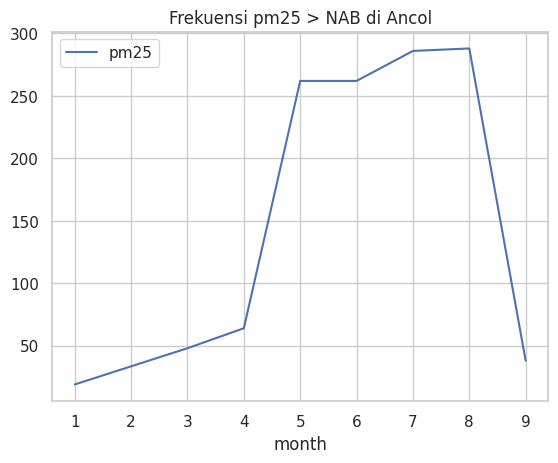

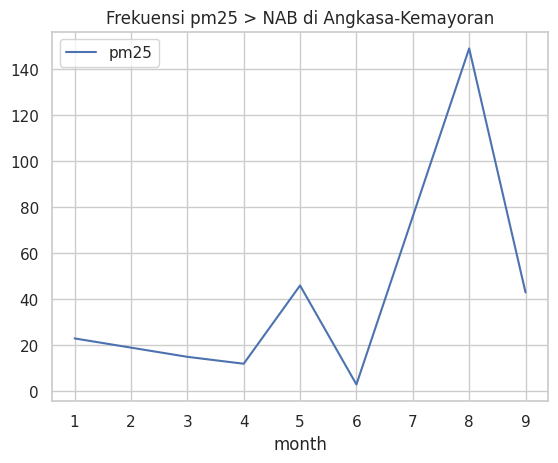

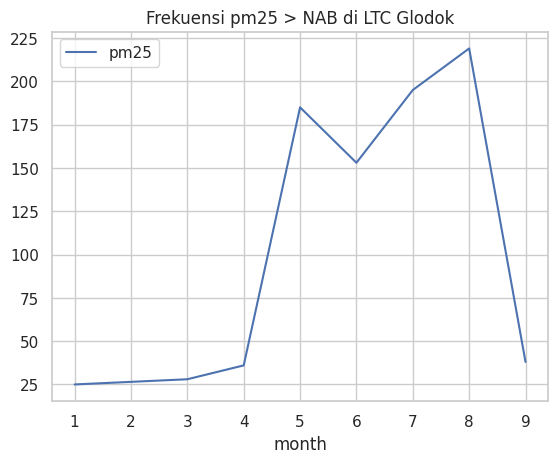

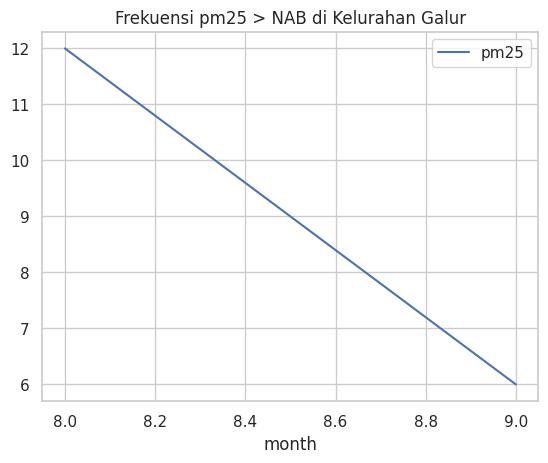

In [ ]:
for j in df['location'].unique():
  tes =df[((df['location'] == j) & (df['pm25'] > 55.4))]
  tes['month'] = pd.DatetimeIndex(tes['date']).month
  tes2 = tes.groupby(['month'])[['pm25']].count()
  tes2.plot()
  plt.title('Frekuensi pm25 > NAB di ' + j)

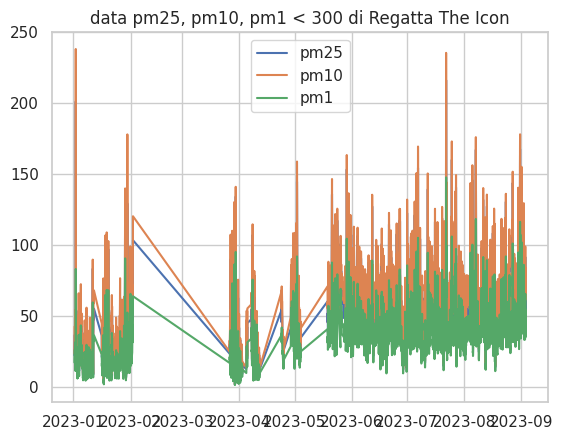

<Figure size 1000x600 with 0 Axes>

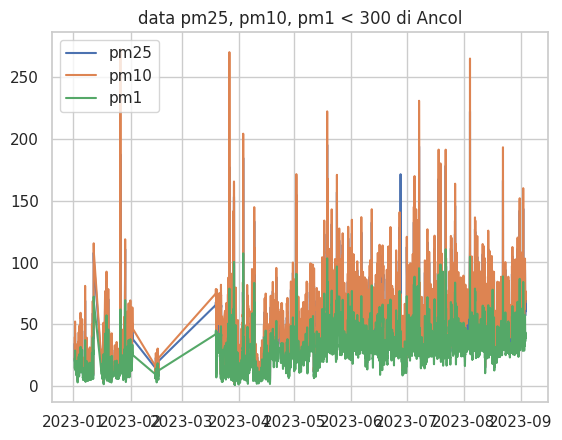

<Figure size 1000x600 with 0 Axes>

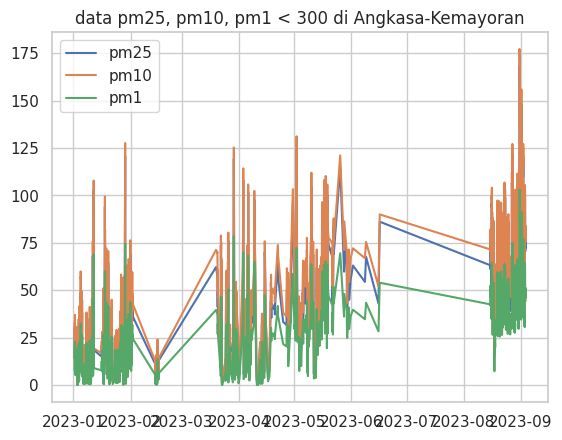

<Figure size 1000x600 with 0 Axes>

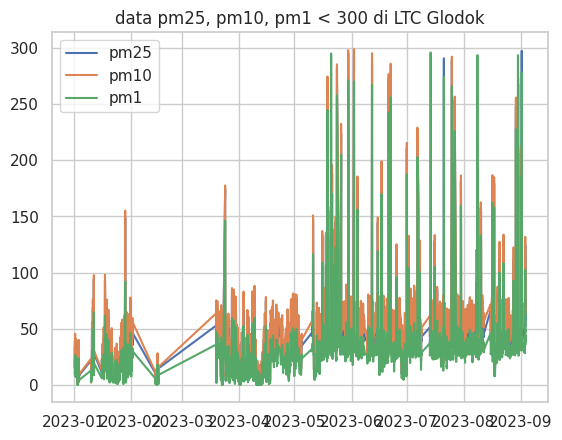

<Figure size 1000x600 with 0 Axes>

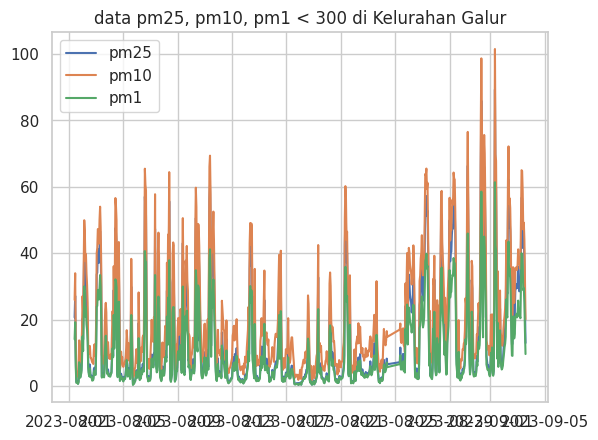

<Figure size 1000x600 with 0 Axes>

In [ ]:
#Grafik saat kita zoom in untuk melihat cycle nya lebih baik

for j in df['location'].unique():
  for i in ['pm25', 'pm10', 'pm1']:
    tes =df[(df['location'] == j) & (df[i] < 300)]
    plt.title('data pm25, pm10, pm1 < 300 di ' + j)
    plt.plot(tes['date'], tes[i])
    plt.legend(['pm25', 'pm10', 'pm1'])

  plt.figure(figsize=(10, 6))
  plt.show()

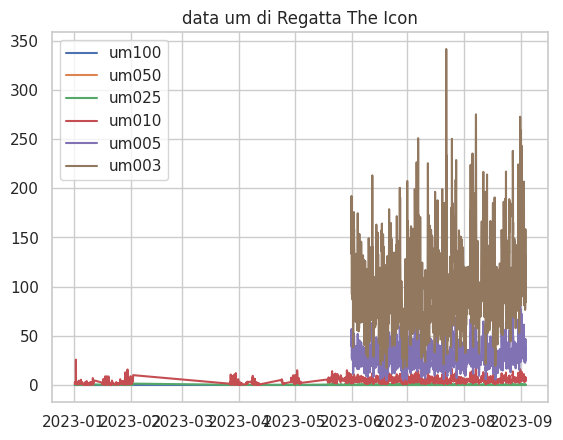

<Figure size 1000x600 with 0 Axes>

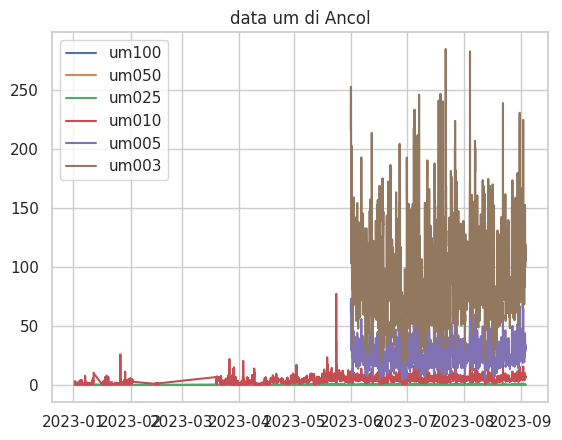

<Figure size 1000x600 with 0 Axes>

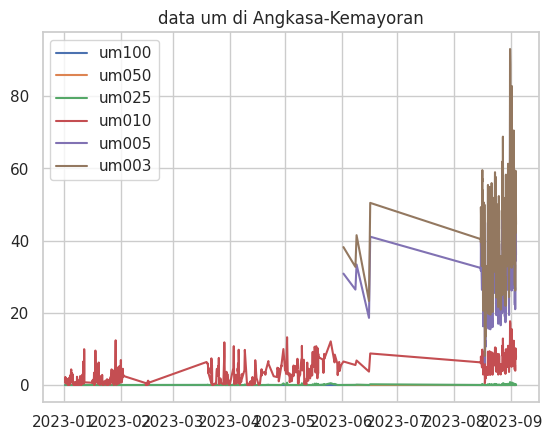

<Figure size 1000x600 with 0 Axes>

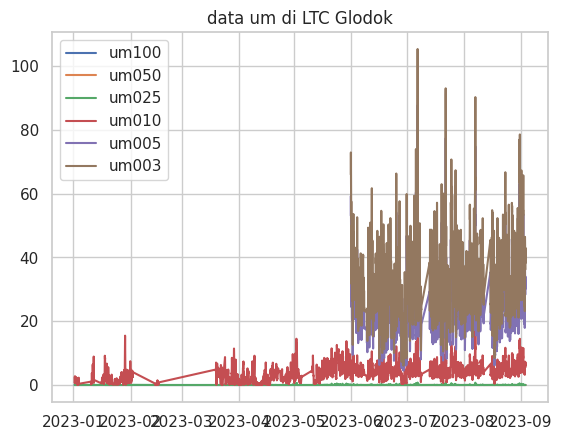

<Figure size 1000x600 with 0 Axes>

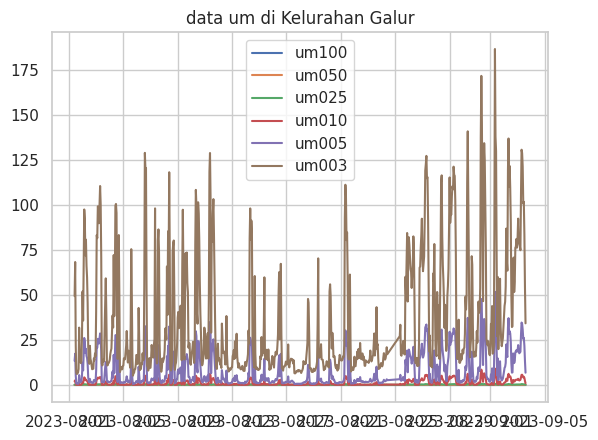

<Figure size 1000x600 with 0 Axes>

In [ ]:
for j in df['location'].unique():
  for i in ['um100', 'um050' ,'um025', 'um010', 'um005', 'um003']:
    tes =df[(df['location'] == j)]
    plt.title('data um di ' + j)
    plt.plot(tes['date'], tes[i])
    plt.legend(['um100', 'um050' ,'um025', 'um010', 'um005', 'um003'])

  plt.figure(figsize=(10, 6))
  plt.show()

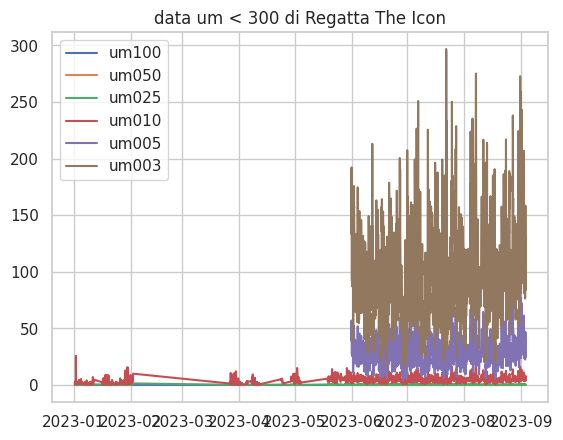

<Figure size 1000x600 with 0 Axes>

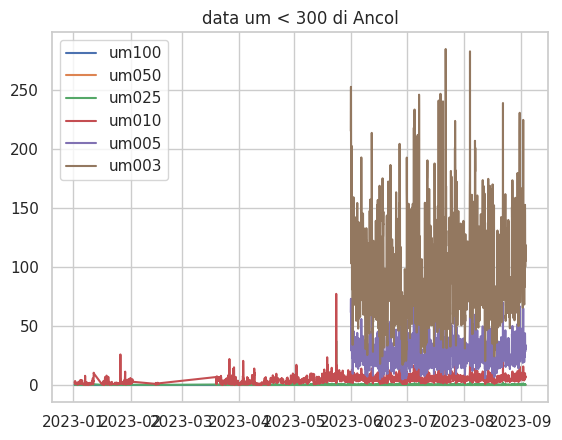

<Figure size 1000x600 with 0 Axes>

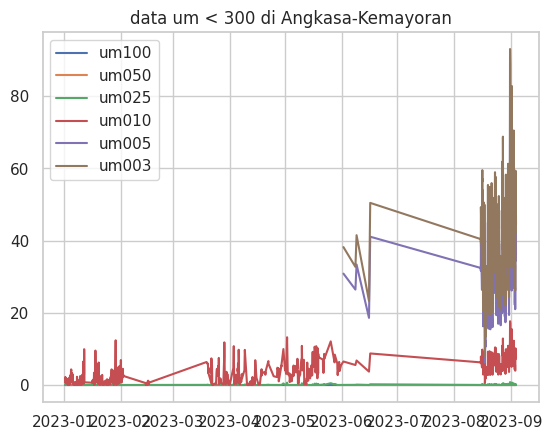

<Figure size 1000x600 with 0 Axes>

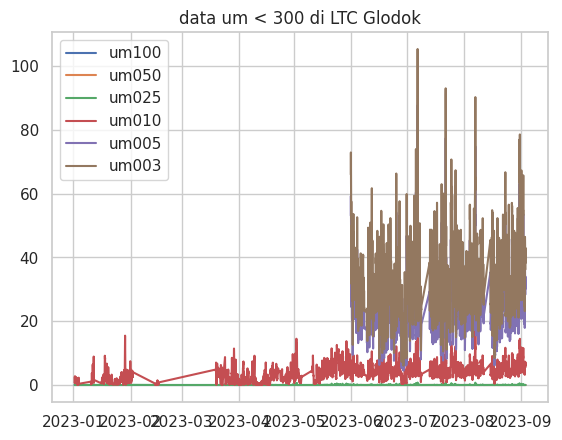

<Figure size 1000x600 with 0 Axes>

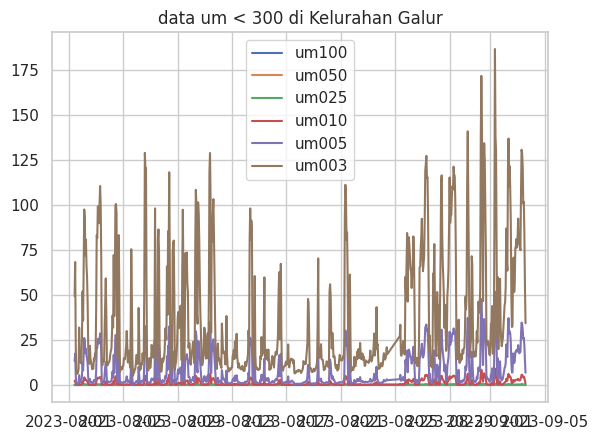

<Figure size 1000x600 with 0 Axes>

In [ ]:
for j in df['location'].unique():
  for i in ['um100', 'um050' ,'um025', 'um010', 'um005', 'um003']:
    tes =df[(df['location'] == j) & (df[i] < 300)]
    plt.title('data um < 300 di ' + j)
    plt.plot(tes['date'], tes[i])
    plt.legend(['um100', 'um050' ,'um025', 'um010', 'um005', 'um003'])

  plt.figure(figsize=(10, 6))
  plt.show()

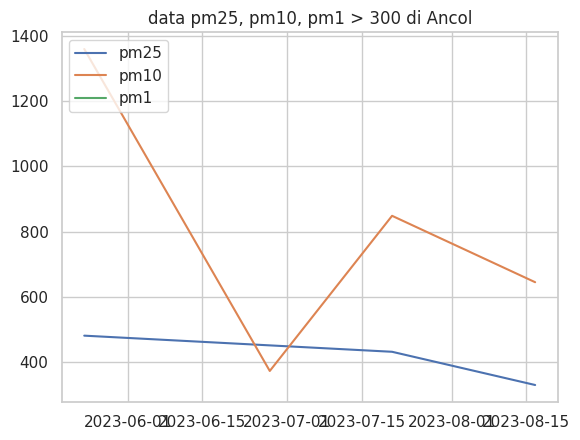

<Figure size 1000x600 with 0 Axes>

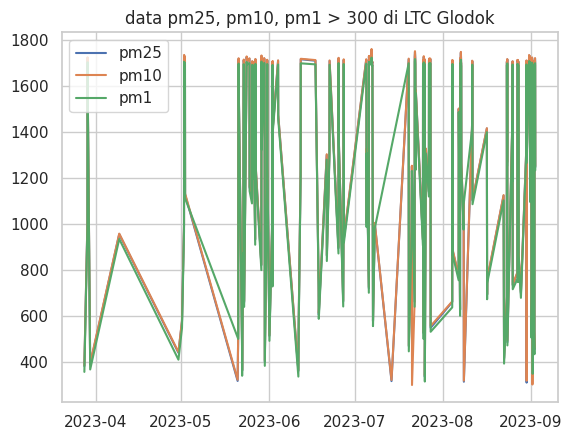

<Figure size 1000x600 with 0 Axes>

In [ ]:
loc = ['Ancol', 'LTC Glodok']
for j in loc:
  for i in ['pm25', 'pm10', 'pm1']:
    tes=df[(df['location'] == j) & (df[i] > 300)]
    plt.title('data pm25, pm10, pm1 > 300 di ' + j)
    plt.plot(tes['date'], tes[i])
    plt.legend(['pm25', 'pm10', 'pm1'], loc='upper left')

  plt.figure(figsize=(10, 6))
  plt.show()

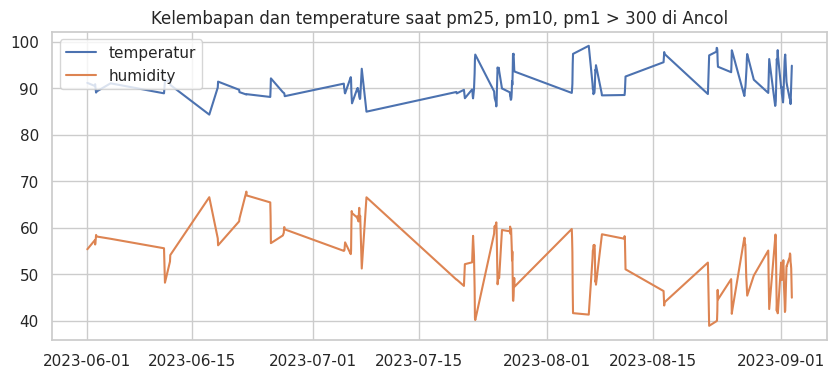

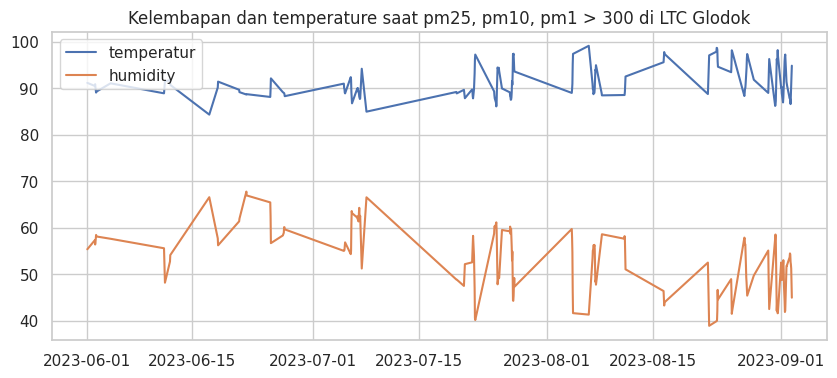

In [ ]:
loc = ['Ancol', 'LTC Glodok']
for j in loc:
  test=df[df['location'] == j]
  plt.figure(figsize=(10, 4))
  plt.plot(tes['date'], tes['temperature'], label='temperatur')
  plt.plot(tes['date'], tes['humidity'], label='humidity')
  for i in ['pm25', 'pm10', 'pm1']:
    test=df[df[i] > 300]
    plt.title('Kelembapan dan temperature saat pm25, pm10, pm1 > 300 di ' + j)
    plt.legend(loc='upper left')
  plt.show()

# **Tambahan**

In [ ]:
df.to_csv("df_nodrop.csv", index=False)

In [ ]:
df_drop.to_csv("df_drop.csv",index=False)